In [1]:
library(tidyverse)
library(ggplot2)
library(ggridges)
library(gridExtra)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# histogram of the number of gene sets per lib_name

In [2]:
geneset_sz = readr::read_tsv("geneset_sz.tsv")

Rows: 2939 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): lib_name, descr
dbl (1): num_genes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(geneset_sz)

lib_name,descr,num_genes
<chr>,<chr>,<dbl>
KEGG_2021_Human,ABC transporters,45
KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,100
KEGG_2021_Human,AMPK signaling pathway,120
KEGG_2021_Human,Acute myeloid leukemia,67
KEGG_2021_Human,Adherens junction,71
KEGG_2021_Human,Adipocytokine signaling pathway,69


In [4]:
unique(geneset_sz$lib_name)

[1] "KEGG_2021_Human"        "Reactome_2022"          "WikiPathway_2023_Human"

In [5]:
# Count the number of gene sets per lib_name
gene_set_counts <- geneset_sz %>%
  group_by(lib_name) %>%
  summarise(num_gene_sets = n()) 

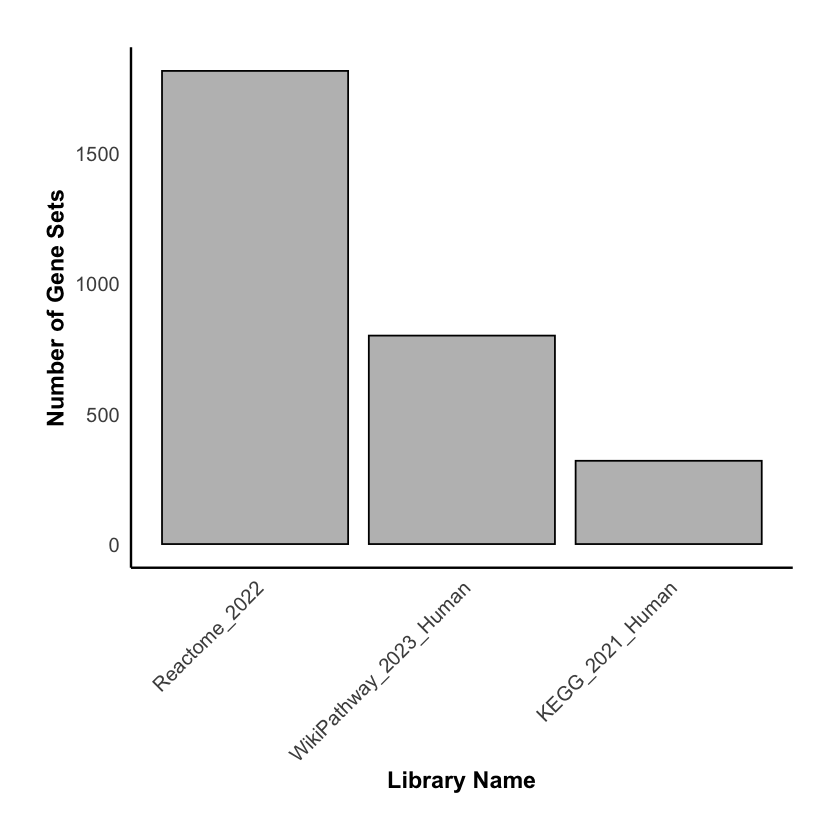

In [6]:
# Create the plot
p <- ggplot(gene_set_counts, aes(x = reorder(lib_name, -num_gene_sets), y = num_gene_sets)) +
  geom_bar(stat = "identity", fill = "grey", color = "black") +
  xlab("Library Name") +
  ylab("Number of Gene Sets") +
  theme_minimal(base_size = 15) + # Minimal theme with a base font size
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"), 
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    plot.margin = margin(1, 1, 1, 1, "cm"), # Top, right, bottom, left margins

  ) 
p

In [7]:
ggsave("figures/1_number_of_gene_sets_per_lib.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# boxplot of the number of genes in each gene set for each library

Warning message:
“The dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(y)` instead.”


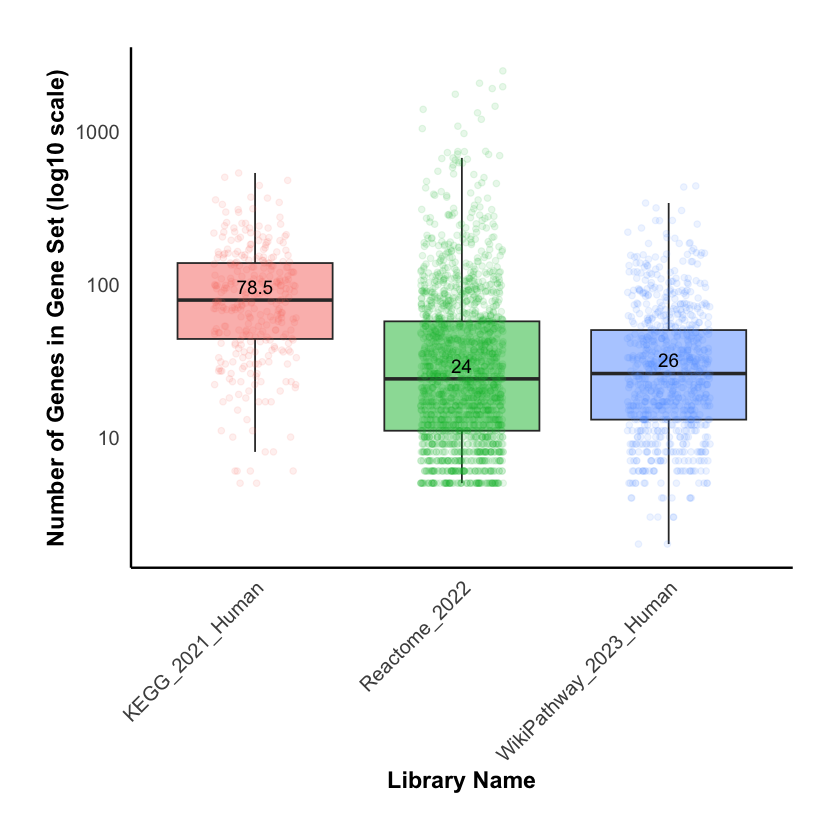

In [8]:
p <- ggplot(geneset_sz, aes(x = lib_name, y = num_genes, fill = lib_name)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  geom_jitter(width = 0.2, alpha = 0.1, aes(color = lib_name)) +  # Add jittered points to show individual data points
  stat_summary(fun = median, geom = "text", aes(label = round(..y.., 1)), vjust = -0.5, color = "black", size = 4) +  # Add median values
  scale_y_log10() +  # Use a logarithmic scale for the y-axis
  xlab("Library Name") +
  ylab("Number of Genes in Gene Set (log10 scale)") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [9]:
ggsave("figures/3_boxplot_number_of_genes_per_lib.pdf", plot = p, device = "pdf", width = 8, height = 8, dpi = 300)

# Percentage of significant gene sets

In [10]:
df <- readr::read_tsv("genes_overlap.tsv")

Rows: 34512 Columns: 13
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): database, model, gene_set, descr
dbl (9): ncurated, nllm, ninter, generatio, bgratio, non_hgcn, ndup, p_val, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
head(df)

database,model,gene_set,descr,ncurated,nllm,ninter,generatio,bgratio,non_hgcn,ndup,p_val,p_val_adj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,ABC transporters,45,13,7,0.5384615,0.002267459,6,0,3.258955e-16,1.042866e-13
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AGE-RAGE signaling pathway in diabetic complications,100,69,22,0.3188406,0.005038799,14,0,1.297110e-34,4.150751e-32
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AMPK signaling pathway,120,39,13,0.3333333,0.006046559,1,0,5.695660e-20,1.822611e-17
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Acute myeloid leukemia,67,20,4,0.2000000,0.003375995,3,0,5.592375e-07,1.789560e-04
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adherens junction,71,20,8,0.4000000,0.003577547,2,0,2.236612e-15,7.157158e-13
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adipocytokine signaling pathway,69,37,23,0.6216216,0.003476771,2,0,2.876419e-49,9.204541e-47


In [12]:
# Compute the percentage of "descr" that has "p_val_adj" < 0.01 for each "database" and "model"
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(p_val_adj < 0.01) / n() * 100)

`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


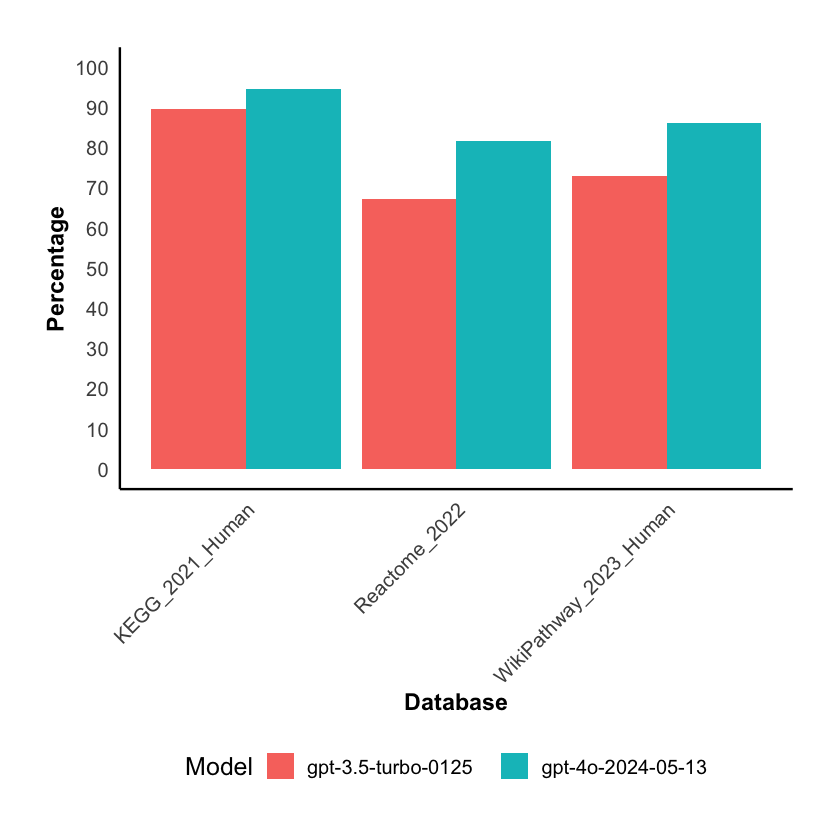

In [13]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [28]:
ggsave("figures/4_percent_sig_compare_models.pdf", plot = p, device = "pdf", width = 10, height = 8, dpi = 300)

# difference between p-values between GPT3 and GPT4
## number of significant gene sets by different p-val threshold

`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


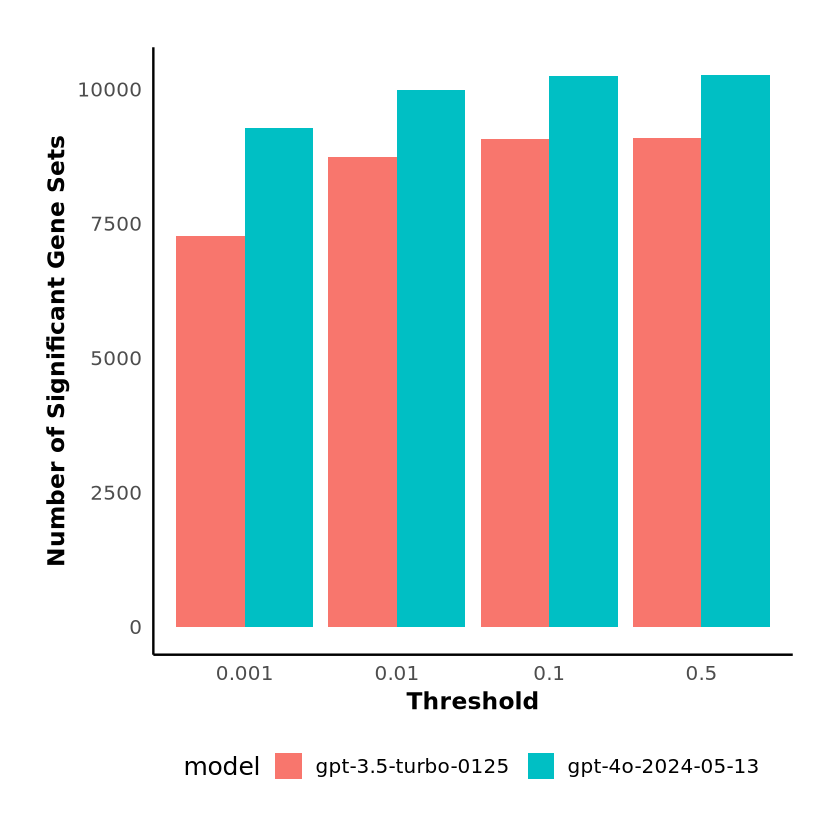

In [11]:
# Read the data
df <- read.csv('genes_overlap.tsv', sep='\t')

# Define p-value thresholds
p_value_thres <- c(0.001, 0.01, 0.1, 0.5)
df_res <- data.frame()

# Loop through each threshold
for (thres in p_value_thres) {
    
    df_thres <- df %>%
        filter(p_val < thres) %>%
        group_by(database, model) %>%
        summarise(gene_set = n()) %>%
        ungroup() %>%
        mutate(thres = thres)
    
    df_res <- bind_rows(df_res, df_thres)
}

# Plotting
 p <- ggplot(df_res, aes(x = factor(thres), y = gene_set, fill = model)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(
         x = "Threshold",
         y = "Number of Significant Gene Sets") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

p

In [12]:
ggsave("figures/number_of_significant_gene_sets_by_different_pval_threshold.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# how many gene sets where n_tries > 1 (fraction)


In [13]:
df <- read.csv('genes_overlap.tsv', sep='\t')

In [14]:
head(df)

,database,model,gene_set,descr,ncurated,nllm,ninter,generatio,bgratio,non_hgcn,ntries,ndup,p_val,p_val_adj
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,ABC transporters,45,13,7,0.5384615,0.002267459,6,1,0,3.258955e-16,1.042866e-13
2,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AGE-RAGE signaling pathway in diabetic complications,100,69,22,0.3188406,0.005038799,14,1,0,1.297110e-34,4.150751e-32
3,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AMPK signaling pathway,120,39,13,0.3333333,0.006046559,1,1,0,5.695660e-20,1.822611e-17
4,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Acute myeloid leukemia,67,20,4,0.2000000,0.003375995,3,1,0,5.592375e-07,1.789560e-04
5,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adherens junction,71,20,8,0.4000000,0.003577547,2,1,0,2.236612e-15,7.157158e-13
6,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adipocytokine signaling pathway,69,37,23,0.6216216,0.003476771,2,1,0,2.876419e-49,9.204541e-47


In [15]:
# Compute the percentage of "descr" that has more than 1 try
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(ntries > 1)/n()*100,
           count = sum(ntries > 1), .groups = 'drop')

In [16]:
percentage_df

database,model,percentage,count
<chr>,<chr>,<dbl>,<int>
KEGG_2021_Human,gpt-3.5-turbo-0125,0.31250000,1
KEGG_2021_Human,gpt-4o-2024-05-13,0.00000000,0
Reactome_2022,gpt-3.5-turbo-0125,0.11025358,2
Reactome_2022,gpt-4o-2024-05-13,0.05512679,1
WikiPathway_2023_Human,gpt-3.5-turbo-0125,0.00000000,0
WikiPathway_2023_Human,gpt-4o-2024-05-13,0.00000000,0


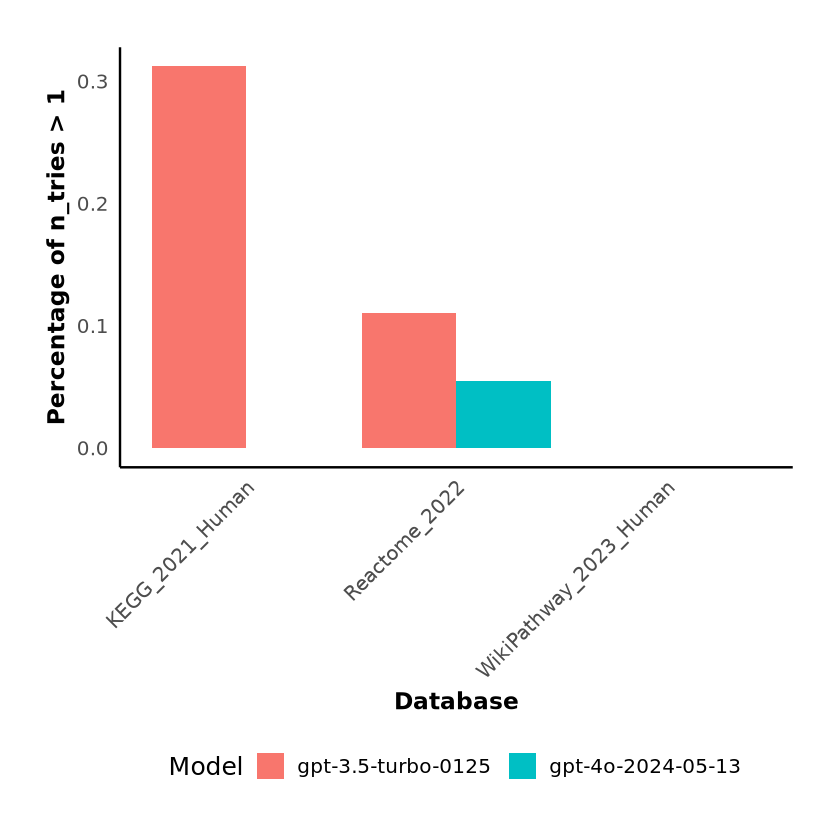

In [19]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  #scale_y_continuous(breaks = seq(0, 10, by = 1), limits = c(0, 1))+
  labs(
       x = "Database",
       y = "Percentage of n_tries > 1",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [20]:
ggsave("figures/n_tries.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# how many gene sets with duplicate genes (and maybe how many?)

In [21]:
df <- read.csv('genes_overlap.tsv', sep='\t')

In [22]:
# Compute the percentage of "descr" that llm generated duplicated genes
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(ndup > 1)/n()*100,
           count = sum(ndup > 0), .groups = 'drop')

In [23]:
percentage_df

database,model,percentage,count
<chr>,<chr>,<dbl>,<int>
KEGG_2021_Human,gpt-3.5-turbo-0125,14.062500,67
KEGG_2021_Human,gpt-4o-2024-05-13,3.437500,28
Reactome_2022,gpt-3.5-turbo-0125,6.229327,203
Reactome_2022,gpt-4o-2024-05-13,2.094818,109
WikiPathway_2023_Human,gpt-3.5-turbo-0125,7.268170,105
WikiPathway_2023_Human,gpt-4o-2024-05-13,1.250000,60


Saving 6.67 x 6.67 in image


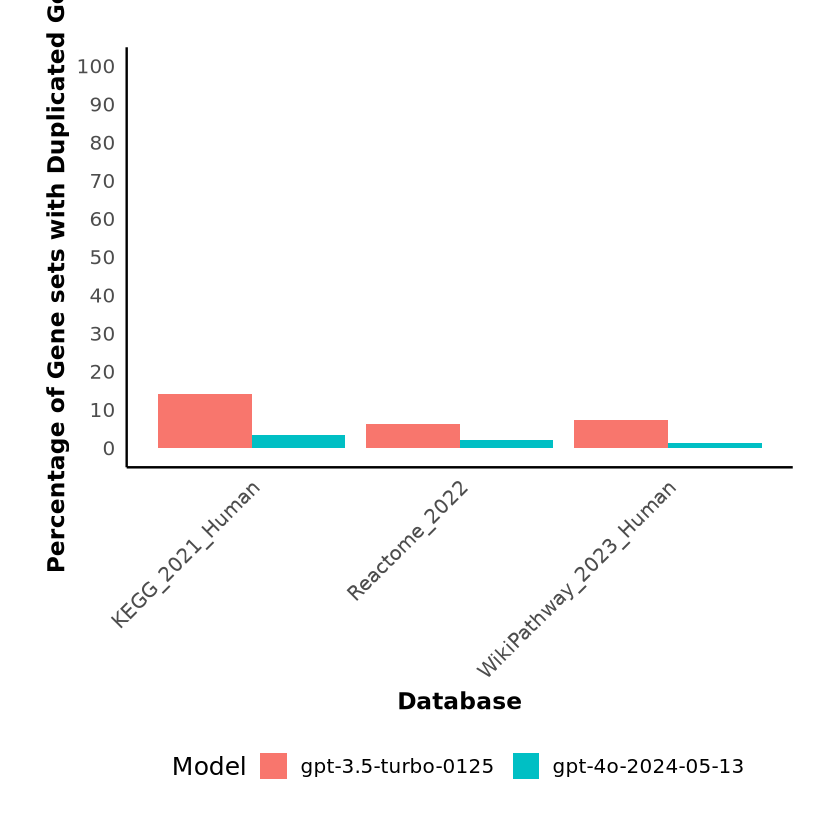

In [24]:
# fraction of gene sets where have duplicated genes

p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage of Gene sets with Duplicated Genes",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [25]:
ggsave("figures/percent_genesets_with_dups.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

In [26]:
plot_df <- df %>%
  filter(gene_set == "llm_genes_role", ndup > 1)

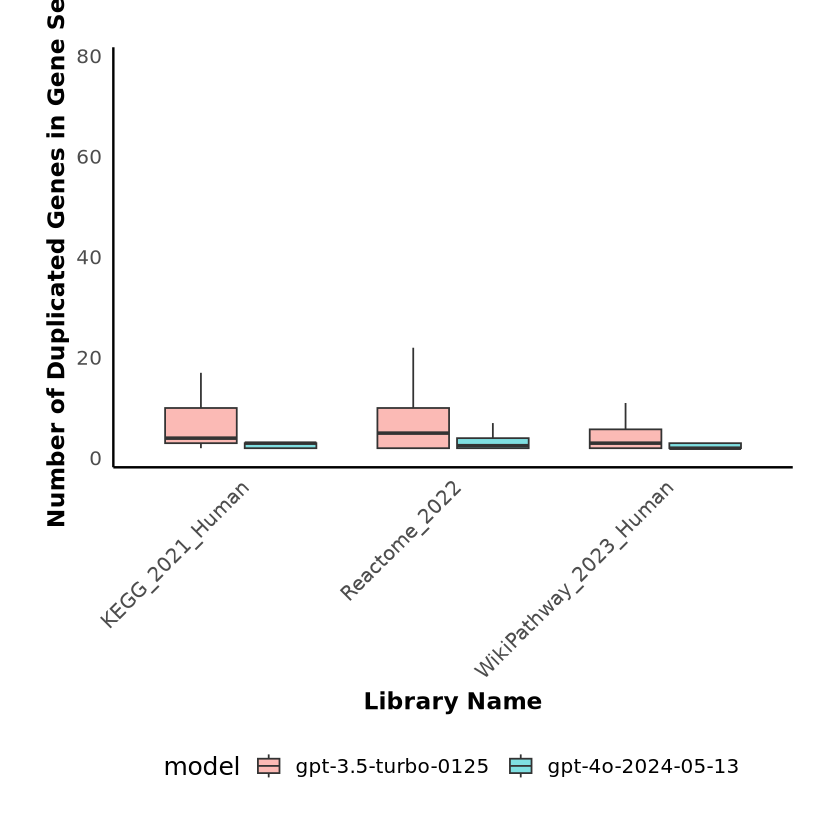

In [29]:
# plot the number of duplixated genes in each database
p <- ggplot(plot_df, aes(x = database, y = ndup, fill = model)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  #scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  xlab("Library Name") +
  ylab("Number of Duplicated Genes in Gene Set") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "bottom",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [30]:
ggsave("figures/number_duplicated_genes.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# Fraction of genes returned that were not HGNC genes.
Zia: Can you flip this around to do the percent that were HGCN? 
Jacqueline: I did

In [31]:
df <- read.csv('genes_overlap.tsv', sep='\t')

In [32]:
# Compute the percentage of "descr" that is not HGNC genes, formula non_hgcn/nllm
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = (1-sum(non_hgcn) / sum(nllm)) * 100,.groups = 'drop')
percentage_df

database,model,percentage
<chr>,<chr>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,86.05757
KEGG_2021_Human,gpt-4o-2024-05-13,94.46705
Reactome_2022,gpt-3.5-turbo-0125,86.44319
Reactome_2022,gpt-4o-2024-05-13,94.27928
WikiPathway_2023_Human,gpt-3.5-turbo-0125,86.76551
WikiPathway_2023_Human,gpt-4o-2024-05-13,94.96084


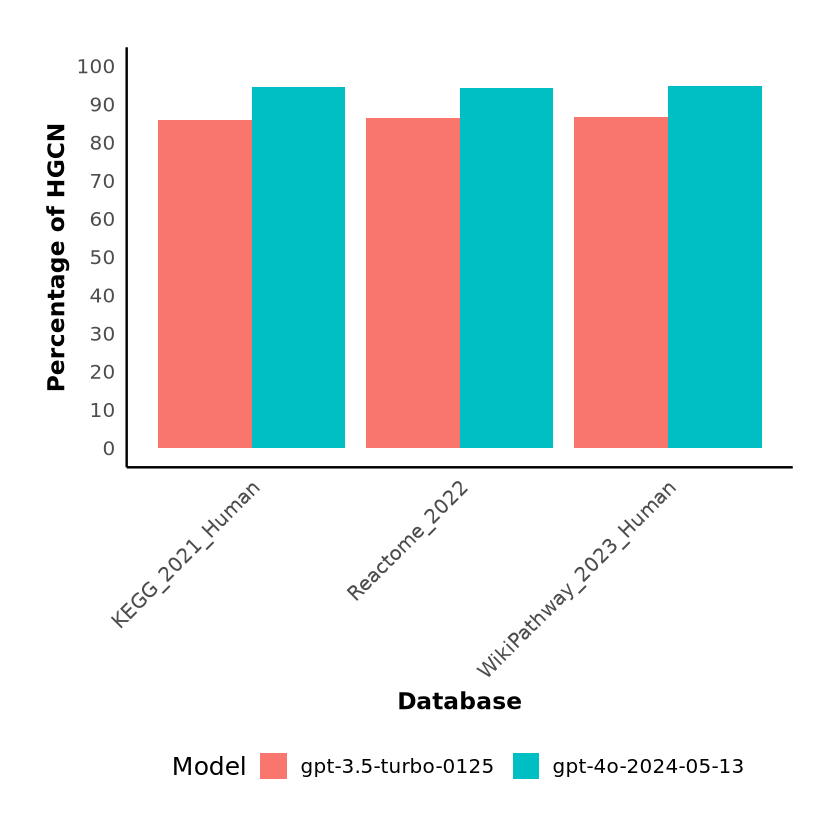

In [33]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage of HGCN",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [34]:
ggsave("figures/HGCN.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# token usage, for prompt with role

In [23]:
df <- read.csv('tok_use.tsv', sep='\t')
head(df)

,lib_name,model,gene_set,in_toks,out_toks
,<chr>,<chr>,<chr>,<int>,<int>
1,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,51489,90284
2,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_norole,48120,74499
3,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_reason,65400,67948
4,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high,70520,54151
5,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high_medium,70520,54151
6,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_ensembled,240600,371720


In [27]:
plot_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  mutate(total_toks = in_toks + out_toks)

summary_df <- plot_df %>%
  group_by(model) %>%
  summarize(
    in_toks = sum(in_toks),
    out_toks = sum(out_toks)
  )

summary_df

cost_df <- summary_df %>%
  mutate(
    cost = case_when(
      model == "gpt-3.5-turbo-0125" ~ in_toks / 1e6 * 0.5 + out_toks / 1e6 * 1.5,
      model == "gpt-4o-2024-05-13" ~ in_toks / 1e6 * 5 + out_toks / 1e6 * 15,
    )
  )
cost_df

model,in_toks,out_toks
<chr>,<int>,<int>
gpt-3.5-turbo-0125,492836,583880
gpt-4o-2024-05-13,496508,931135


model,in_toks,out_toks,cost
<chr>,<int>,<int>,<dbl>
gpt-3.5-turbo-0125,492836,583880,1.122238
gpt-4o-2024-05-13,496508,931135,16.449565


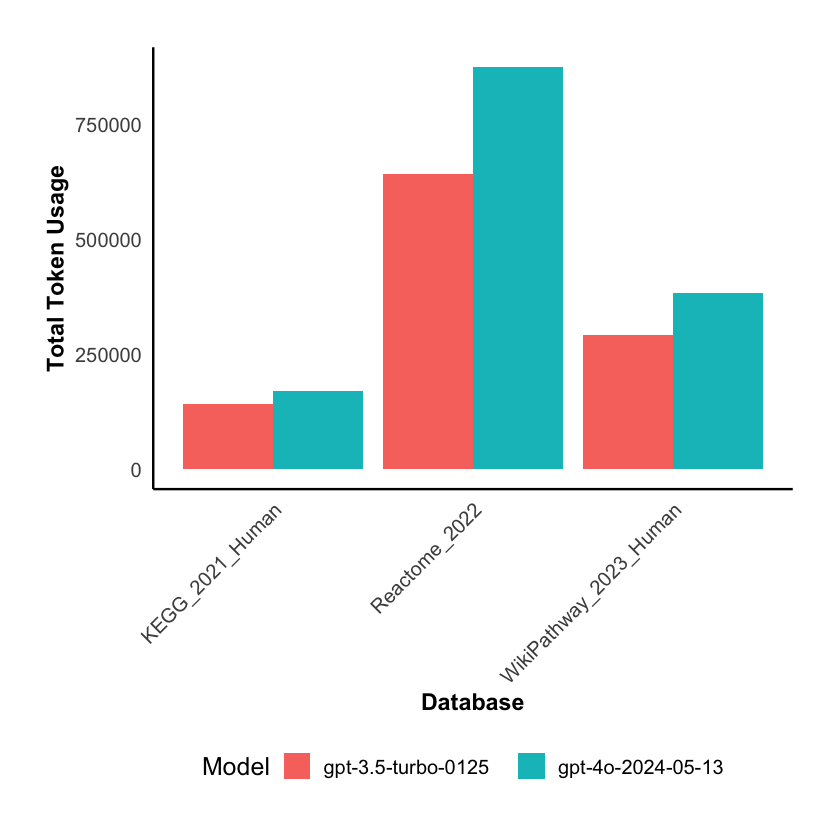

In [28]:
# Total token usage
p <- ggplot(plot_df, aes(x = lib_name, y = total_toks, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous()+
  labs(
       x = "Database",
       y = "Total Token Usage",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [38]:
ggsave("figures/total_token_usage.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

In [39]:
plot_df_long <- plot_df %>%
  pivot_longer(cols = c(in_toks, out_toks), names_to = "token_type", values_to = "toks")

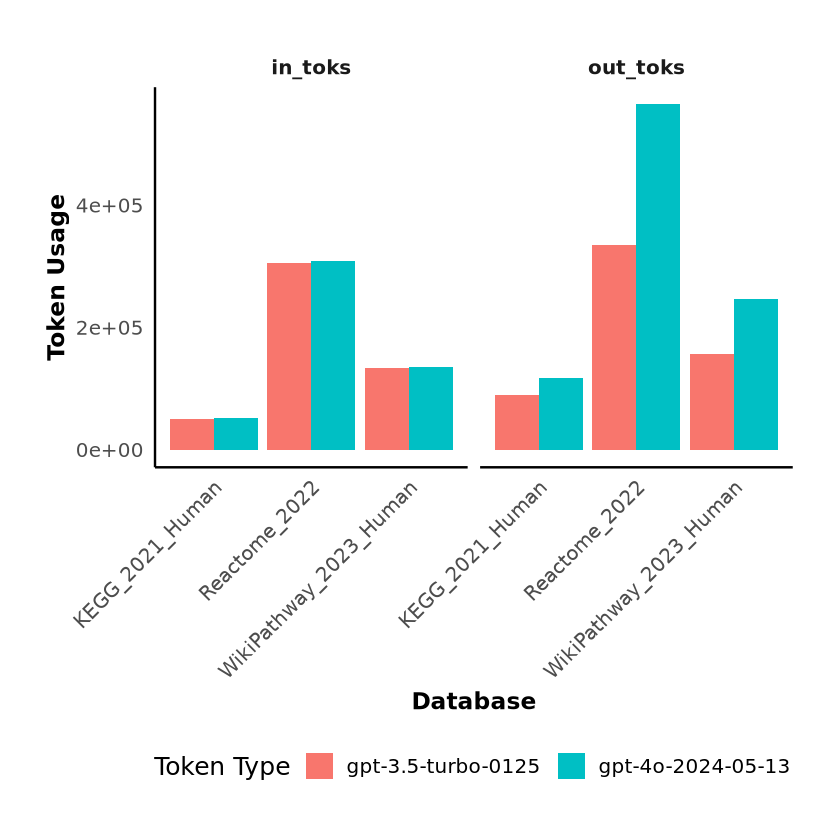

In [40]:
# Create the side-by-side bar plot
p <- ggplot(plot_df_long, aes(x = lib_name, y = toks, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  facet_wrap(~ token_type) + # Facet by model to maintain distinction
  scale_y_continuous() +
  labs(
    x = "Database",
    y = "Token Usage",
    fill = "Token Type"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

print(p)

In [41]:
ggsave("figures/token_usage_breakdonw.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# size of gene sets comparing with ensembl vs. no role vs. high confidence (show sets are smaller)

In [42]:
df <- read.csv('genes_overlap.tsv', sep='\t')
head(df)

,database,model,gene_set,descr,ncurated,nllm,ninter,generatio,bgratio,non_hgcn,ntries,ndup,p_val,p_val_adj
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,ABC transporters,45,13,7,0.5384615,0.002267459,6,1,0,3.258955e-16,1.042866e-13
2,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AGE-RAGE signaling pathway in diabetic complications,100,69,22,0.3188406,0.005038799,14,1,0,1.297110e-34,4.150751e-32
3,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AMPK signaling pathway,120,39,13,0.3333333,0.006046559,1,1,0,5.695660e-20,1.822611e-17
4,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Acute myeloid leukemia,67,20,4,0.2000000,0.003375995,3,1,0,5.592375e-07,1.789560e-04
5,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adherens junction,71,20,8,0.4000000,0.003577547,2,1,0,2.236612e-15,7.157158e-13
6,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adipocytokine signaling pathway,69,37,23,0.6216216,0.003476771,2,1,0,2.876419e-49,9.204541e-47


In [43]:
unique(df$gene_set)

[1] "llm_genes_role"             "llm_genes_norole"          
[3] "llm_genes_reason"           "llm_genes_conf_high"       
[5] "llm_genes_conf_high_medium" "llm_ensembled"

In [44]:
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_norole', 'llm_genes_conf_high', 'llm_ensembled' ))



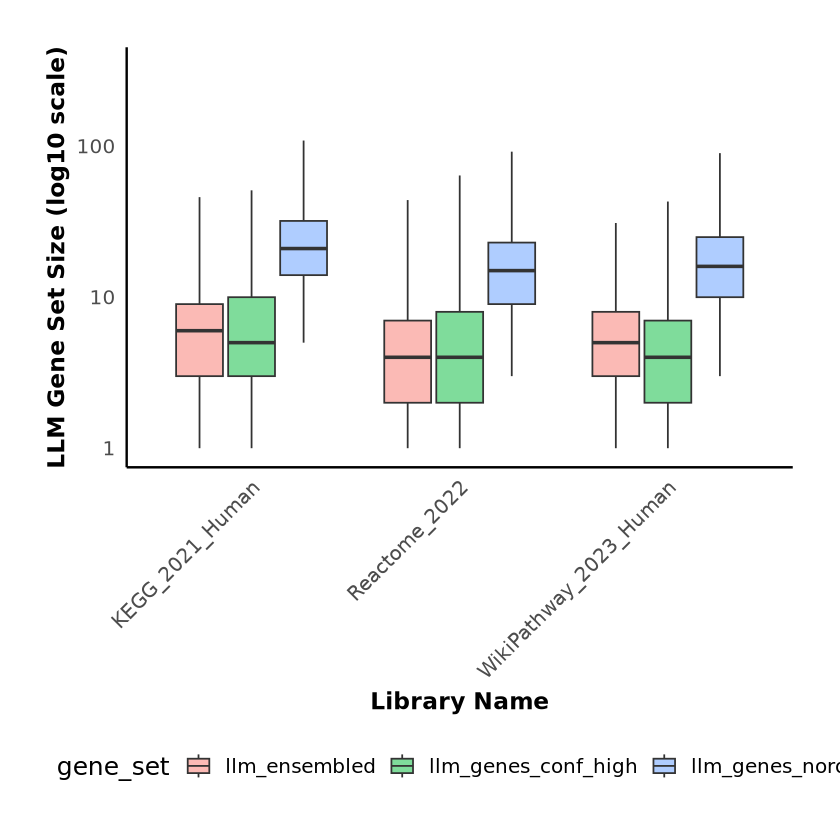

In [46]:
# plot the number of duplixated genes in each database
p <- ggplot(plot_df, aes(x = database, y = nllm, fill = gene_set)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  scale_y_log10() +  # Use a logarithmic scale for the y-axis
  xlab("Library Name") +
  ylab("LLM Gene Set Size (log10 scale)") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "bottom",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [47]:
ggsave("figures/llm_geneset_size.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# plot showing token usage for all 4 strategies

In [8]:
df <- read.csv('tok_use.tsv', sep='\t')
head(df)

,lib_name,model,gene_set,in_toks,out_toks
,<chr>,<chr>,<chr>,<int>,<int>
1,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,51489,90284
2,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_norole,48120,74499
3,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_reason,65400,67948
4,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high,70520,54151
5,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high_medium,70520,54151
6,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_ensembled,240600,371720


In [9]:
df <- df %>%
  mutate(total_toks = in_toks + out_toks)

In [15]:
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_reason', 'llm_genes_conf_high', 'llm_ensembled', 'llm_genes_norole'))


In [16]:
plot_df

lib_name,model,gene_set,in_toks,out_toks,total_toks
<chr>,<chr>,<chr>,<int>,<int>,<int>
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_norole,48120,74499,122619
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_reason,65400,67948,133348
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high,70520,54151,124671
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_ensembled,240600,371720,612320
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_norole,48572,107538,156110
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_reason,65532,187685,253217
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_conf_high,70652,152304,222956
KEGG_2021_Human,gpt-4o-2024-05-13,llm_ensembled,243009,534011,777020
Reactome_2022,gpt-3.5-turbo-0125,llm_genes_norole,288099,270200,558299


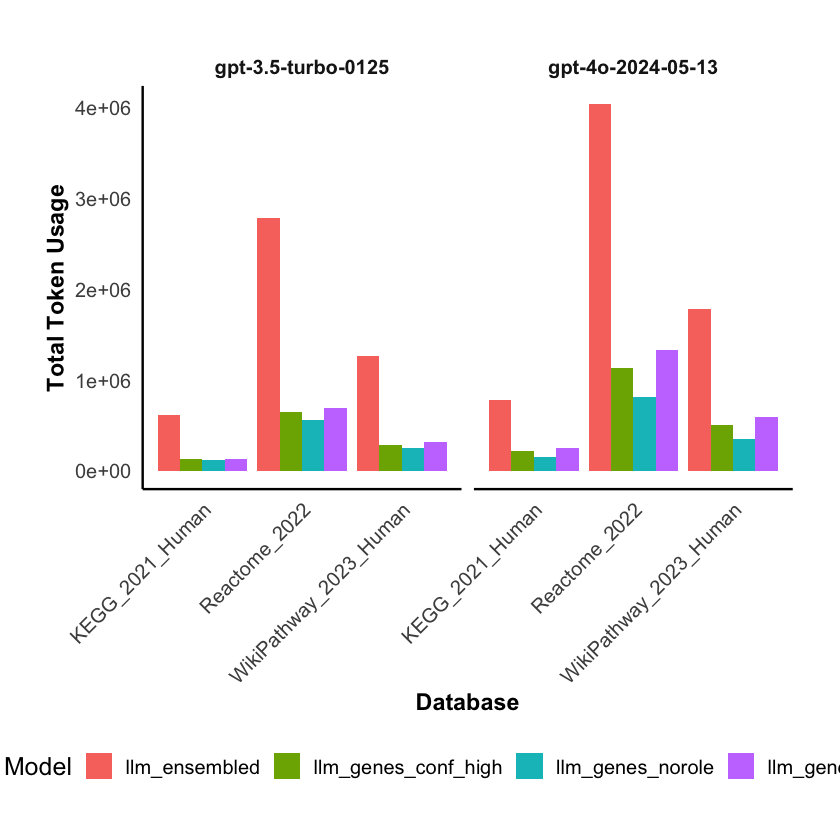

In [17]:
# Create the faceted bar plot
p <- ggplot(plot_df, aes(x = lib_name, y = total_toks, fill = gene_set)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous() +
  labs(
    x = "Database",
    y = "Total Token Usage",
    fill = "Model"
  ) +
  facet_wrap(~ model) +  # Facet by gene_set and allow different y-scales for each facet
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

p


In [21]:
ggsave("figures/ntoken_by_method.pdf", plot = p, device = "pdf",width = 9, height = 6, dpi = 300)

# calculation of cost
Zia: This calculation is incorrect. You need to count input and output tokens separately.


In [70]:
# gpt-3.5-turbo-0125 $0.50 / 1M input tokens
# gpt-4o-2024-05-13 $$5.00 / 1M input tokens

In [55]:
df <- read.csv('tok_use.tsv', sep='\t')
df <- df %>%
  mutate(total_toks = in_toks + out_toks)
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_role', 'llm_genes_norole', 'llm_genes_conf_high', 'llm_ensembled')) %>%
  mutate(cost = case_when(
    model == "gpt-3.5-turbo-0125" ~ total_toks * 0.5 / 1e6,
    model == "gpt-4o-2024-05-13" ~ total_toks * 5 / 1e6
  ))


In [56]:
plot_df

lib_name,model,gene_set,in_toks,out_toks,total_toks,cost
<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,51489,90284,141773,0.0708865
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_norole,48120,74499,122619,0.0613095
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high,70520,54151,124671,0.0623355
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_ensembled,240600,371720,612320,0.3061600
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_role,51772,117996,169768,0.8488400
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_norole,48572,107538,156110,0.7805500
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_conf_high,70652,152304,222956,1.1147800
KEGG_2021_Human,gpt-4o-2024-05-13,llm_ensembled,243009,534011,777020,3.8851000
Reactome_2022,gpt-3.5-turbo-0125,llm_genes_role,306458,335874,642332,0.3211660


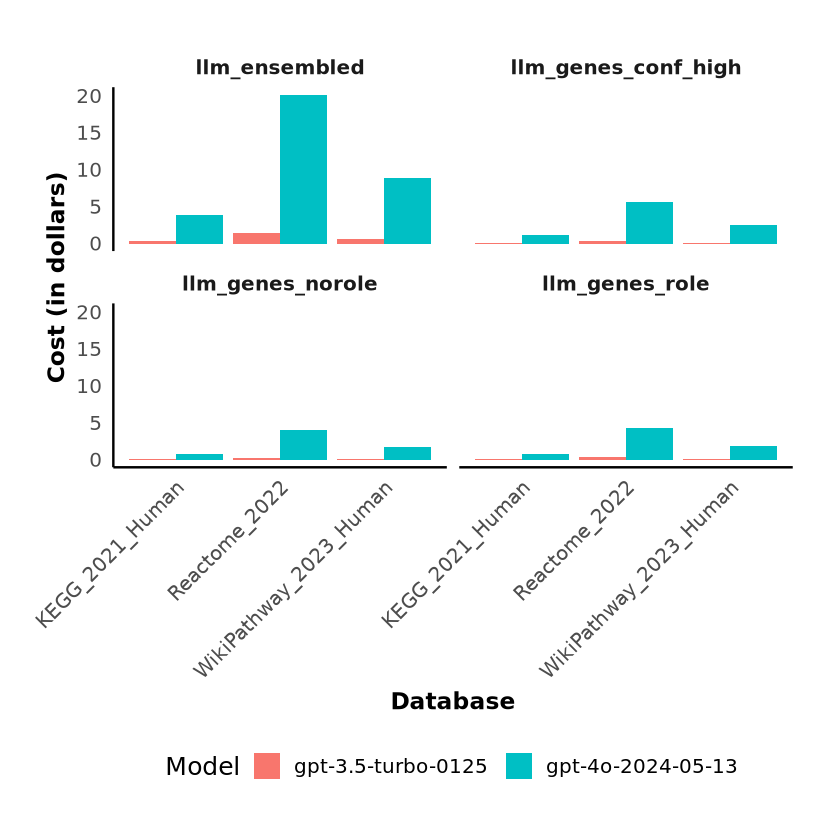

In [57]:
# Create the faceted bar plot
p <- ggplot(plot_df, aes(x = lib_name, y = cost, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous() +
  labs(
    x = "Database",
    y = "Cost (in dollars)",
    fill = "Model"
  ) +
  facet_wrap(~ gene_set) +  # Facet by gene_set and allow different y-scales for each facet
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

print(p)

In [58]:
ggsave("figures/cost_by_method.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# ROUGE

In [2]:
df <- read.delim('rouge_scores.tsv', header = TRUE, sep = "\t")

In [4]:
head(df)

,library,gt_name_1,gt_name_2,gsai_ROUGE1_1,gsai_ROUGE1_2,llm2geneset_ROUGE1_1,llm2geneset_ROUGE1_2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,KEGG_2021_Human,Basal transcription factors,Relaxin signaling pathway,0.25,0.2500000,0.4,0.6666667
2,KEGG_2021_Human,Non-small cell lung cancer,Ascorbate and aldarate metabolism,0.00,0.3636364,0.0,0.0000000
3,KEGG_2021_Human,Primary immunodeficiency,Salivary secretion,0.00,0.0000000,0.0,1.0000000
4,KEGG_2021_Human,Viral myocarditis,PD-L1 expression and PD-1 checkpoint pathway in cancer,0.00,0.1250000,0.0,0.1538462
5,KEGG_2021_Human,Chronic myeloid leukemia,Pentose and glucuronate interconversions,0.00,0.1333333,0.0,0.0000000
6,KEGG_2021_Human,Huntington disease,Olfactory transduction,0.00,0.5000000,0.0,0.4000000


## Gene set 1

### Show ROUGE1 scores distribution across different library

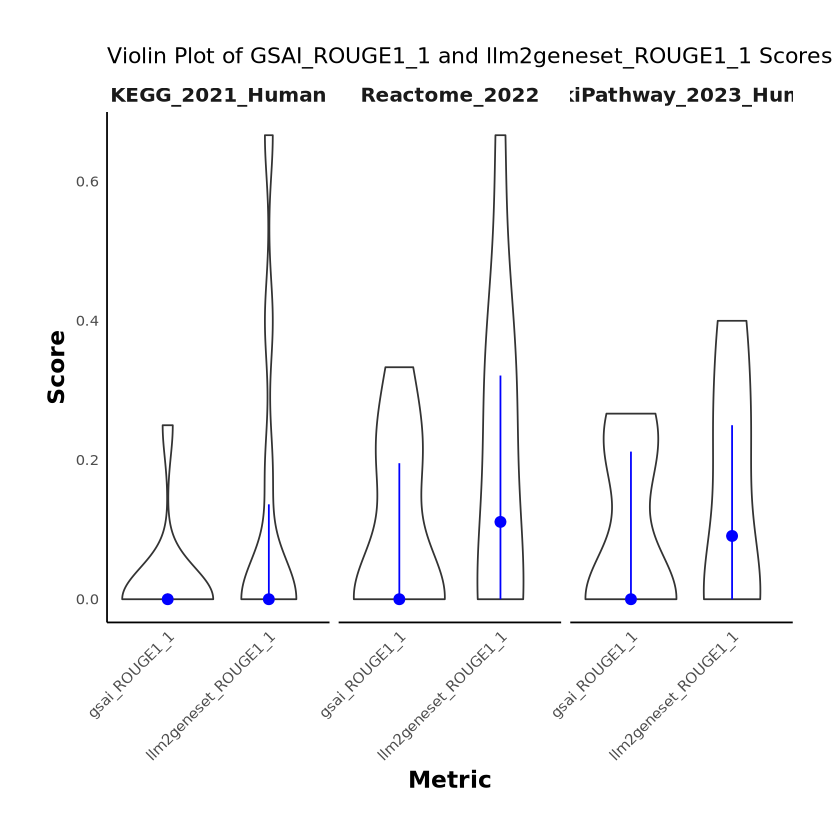

In [41]:
df_long <- df %>%
  pivot_longer(cols = c(gsai_ROUGE1_1, llm2geneset_ROUGE1_1), 
               names_to = "Metric", 
               values_to = "Score")

# Create the violin plot
ggplot(df_long, aes(x = Metric, y = Score)) +
  geom_violin() +
  stat_summary(fun = median, geom = "point", shape = 23, size = 2, color = "red", fill = "yellow") +
  stat_summary(
    fun.data = function(y) {
      data.frame(
        y = median(y),
        ymin = quantile(y, 0.25),
        ymax = quantile(y, 0.75)
      )
    },
    geom = "pointrange", 
    color = "blue"
  ) +
  facet_wrap(~ library) +
  labs(title = "Violin Plot of GSAI_ROUGE1_1 and llm2geneset_ROUGE1_1 Scores by Library",
       x = "Metric",
       y = "Score") +
  theme_minimal()+
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )


### count number of predicted gene set names with ROUGE1 > 0.3
ROUGE1 < 0.3 consider very bad

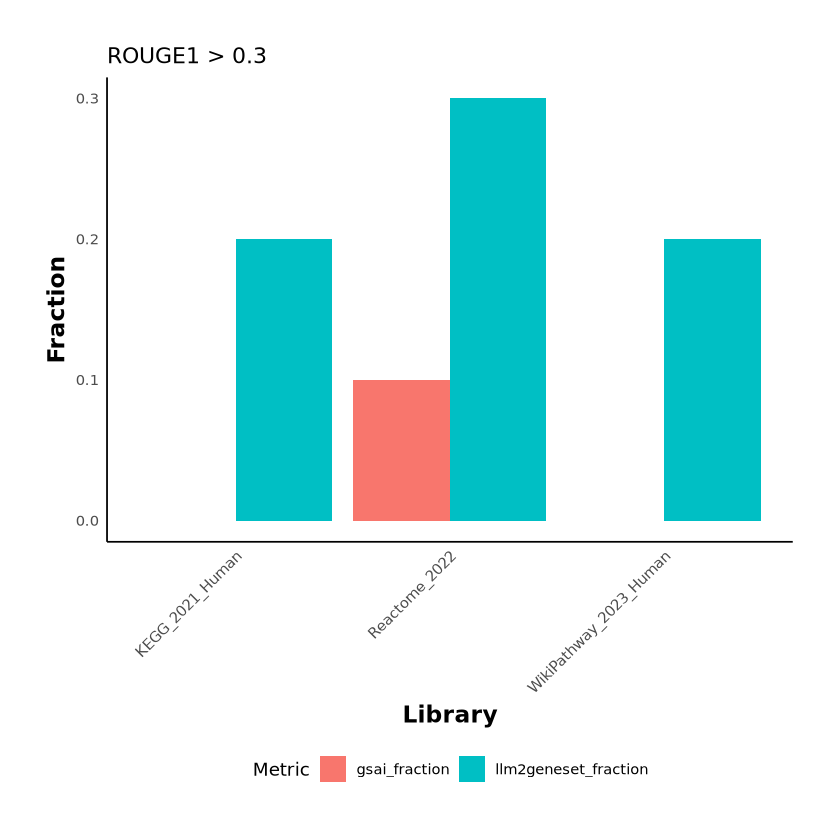

In [34]:
# Group by "library" and calculate the fractions
df_fractions <- df %>%
  group_by(library) %>%
  summarise(
    gsai_fraction = sum(gsai_ROUGE1_1 > 0.3, na.rm = TRUE) / n(),
    llm2geneset_fraction = sum(llm2geneset_ROUGE1_1 > 0.3, na.rm = TRUE) / n()
  )

# Reshape the fractions data to long format for plotting
df_long <- df_fractions %>%
  pivot_longer(cols = c(gsai_fraction, llm2geneset_fraction), 
               names_to = "Metric", 
               values_to = "Fraction")

# Create the bar plot to show the fractions
ggplot(df_long, aes(x = library, y = Fraction, fill = Metric)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "ROUGE1 > 0.3",
       x = "Library",
       y = "Fraction") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

## Gene set 2

### Show ROUGE1 scores distribution across different library

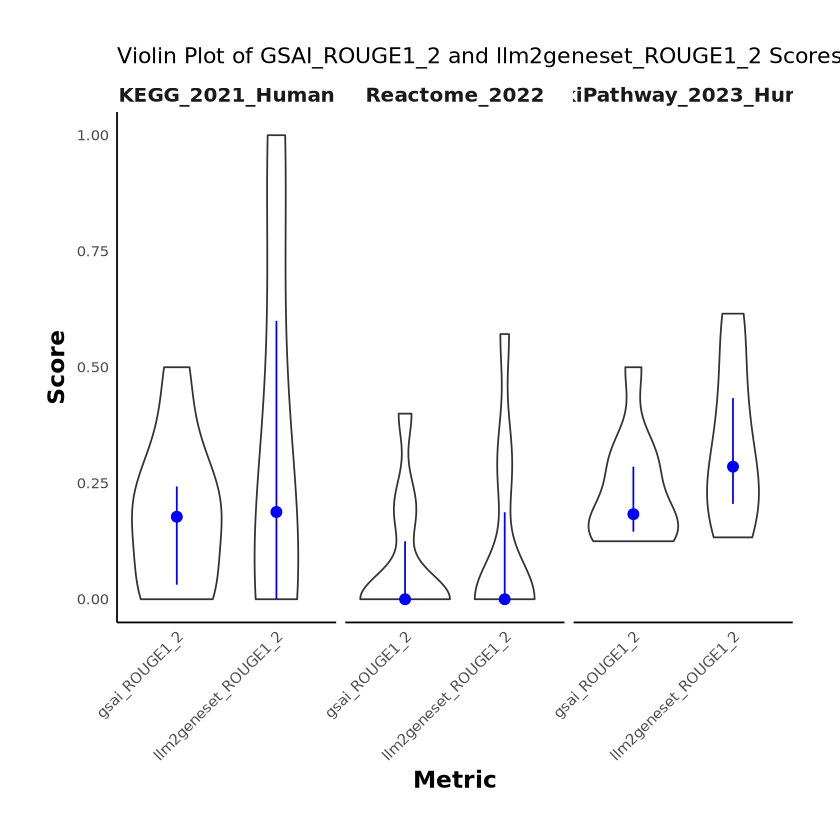

In [42]:
df_long <- df %>%
  pivot_longer(cols = c(gsai_ROUGE1_2, llm2geneset_ROUGE1_2), 
               names_to = "Metric", 
               values_to = "Score")

# Create the violin plot
ggplot(df_long, aes(x = Metric, y = Score)) +
  geom_violin() +
  stat_summary(fun = median, geom = "point", shape = 23, size = 2, color = "red", fill = "yellow") +
  stat_summary(
    fun.data = function(y) {
      data.frame(
        y = median(y),
        ymin = quantile(y, 0.25),
        ymax = quantile(y, 0.75)
      )
    },
    geom = "pointrange", 
    color = "blue"
  ) +
  facet_wrap(~ library) +
  labs(title = "Violin Plot of GSAI_ROUGE1_2 and llm2geneset_ROUGE1_2 Scores by Library",
       x = "Metric",
       y = "Score") +
  theme_minimal()+
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

### count number of predicted gene set names with ROUGE1 > 0.3
ROUGE1 < 0.3 consider very bad

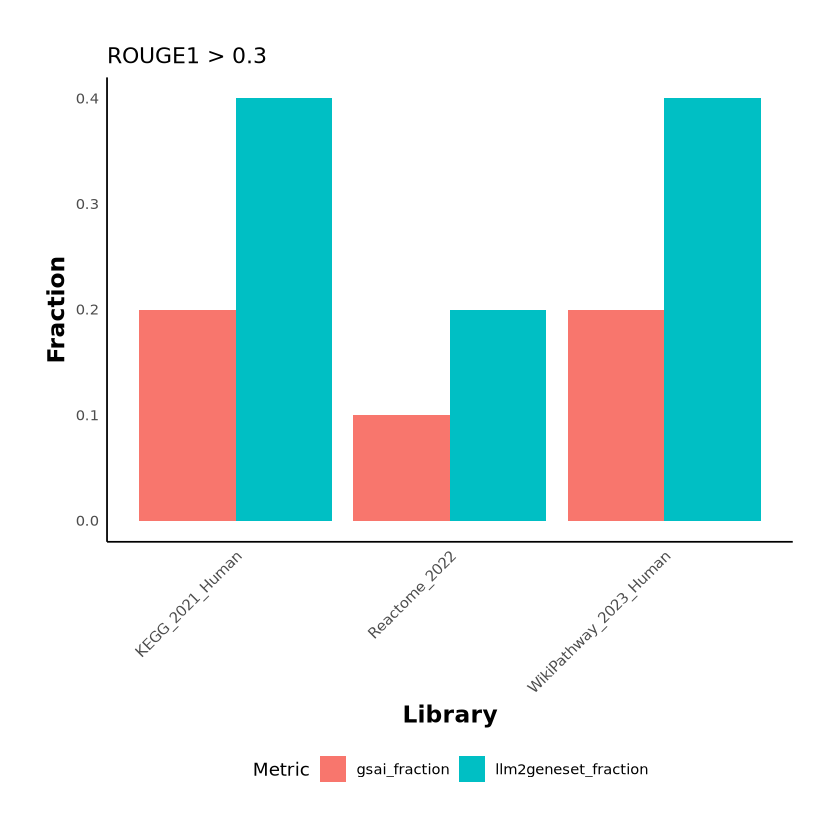

In [43]:
# Group by "library" and calculate the fractions
df_fractions <- df %>%
  group_by(library) %>%
  summarise(
    gsai_fraction = sum(gsai_ROUGE1_2 > 0.3, na.rm = TRUE) / n(),
    llm2geneset_fraction = sum(llm2geneset_ROUGE1_2 > 0.3, na.rm = TRUE) / n()
  )

# Reshape the fractions data to long format for plotting
df_long <- df_fractions %>%
  pivot_longer(cols = c(gsai_fraction, llm2geneset_fraction), 
               names_to = "Metric", 
               values_to = "Fraction")

# Create the bar plot to show the fractions
ggplot(df_long, aes(x = library, y = Fraction, fill = Metric)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "ROUGE1 > 0.3",
       x = "Library",
       y = "Fraction") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

## GSAI

### ROUGE-1

In [138]:
#df <- read.delim('gsai_outputs.tsv', header = TRUE, sep = "\t")
#df <- df  %>% filter(is.finite(gsai_ROUGEL))

df <- read.delim('llm2geneset_outputs.tsv', header = TRUE, sep = "\t")



In [134]:
head(df)

,model,library,gt_name,llm2geneset_name,llm2geneset_ROUGE1,llm2geneset_ROUGE2,llm2geneset_ROUGEL,llm2geneset_csim
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,gpt-3.5-turbo-0125,KEGG_2021_Human,ABC transporters,ATP binding cassette (ABC) transporter complex,1.0000000,1.0,0.5000000,0.6809031
2,gpt-3.5-turbo-0125,KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,Inflammatory response,0.0000000,0.0,0.0000000,0.2534054
3,gpt-3.5-turbo-0125,KEGG_2021_Human,AMPK signaling pathway,mTOR signaling pathway,0.6666667,0.5,0.6666667,0.6977507
4,gpt-3.5-turbo-0125,KEGG_2021_Human,Acute myeloid leukemia,PI3K-Akt signaling pathway,0.0000000,0.0,0.0000000,0.2536233
5,gpt-3.5-turbo-0125,KEGG_2021_Human,Adherens junction,Cell-cell adherens junction,1.0000000,1.0,0.6666667,0.8581968
6,gpt-3.5-turbo-0125,KEGG_2021_Human,Adipocytokine signaling pathway,Regulation of glucose metabolic process,0.0000000,0.0,0.0000000,0.4063797


Picking joint bandwidth of 0.118

Picking joint bandwidth of 0.0399

Picking joint bandwidth of 0.0588



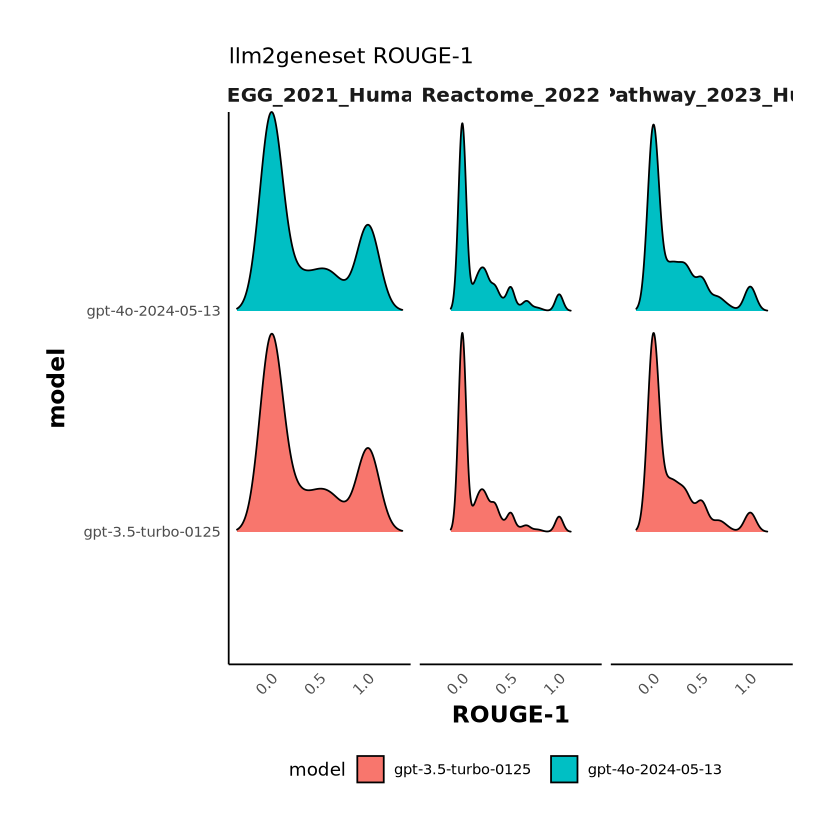

In [135]:
ridge1<-ggplot(df, aes(x = llm2geneset_ROUGE1, y = model, fill = model)) +
  geom_density_ridges(scale = 0.9) +
  facet_wrap(~ library) +
  labs(title = "llm2geneset ROUGE-1",
       x = "ROUGE-1",
       y = "model") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
ridge1

In [12]:
ggsave("figures/llm2geneset_ridge_rouge1.pdf", plot = ridge1, device = "pdf",width = 10, height = 5)

Picking joint bandwidth of 0.118

Picking joint bandwidth of 0.0399

Picking joint bandwidth of 0.0588



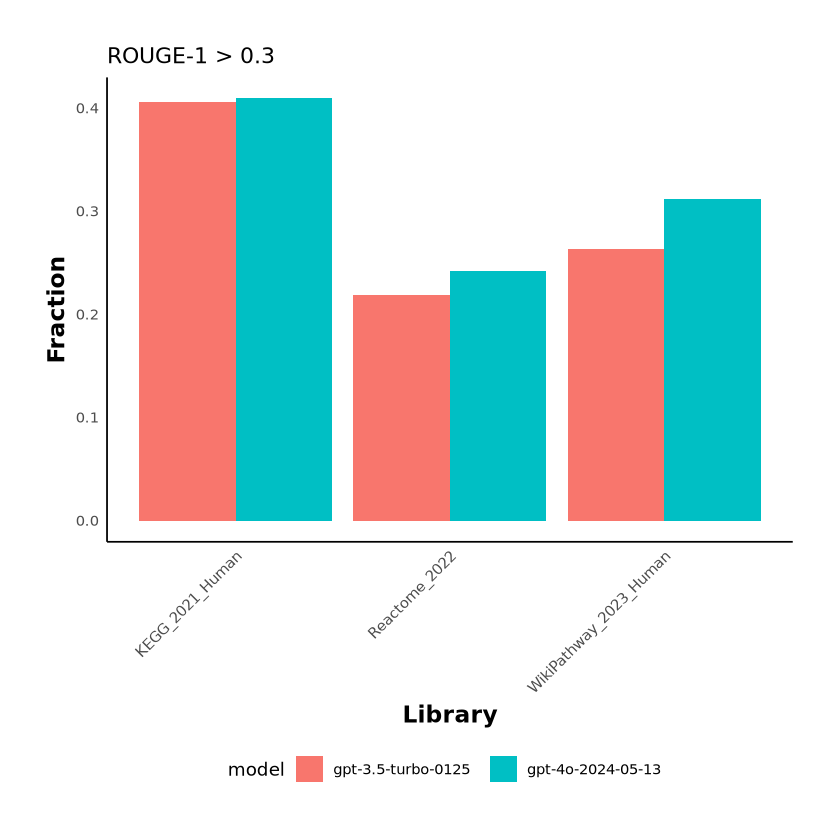

In [13]:
# Group by "library" and calculate the fractions
df_fractions <- df %>%
  group_by(model, library) %>%
  summarise(
    fraction = sum(llm2geneset_ROUGE1 > 0.3, na.rm = TRUE) / n(),
    .groups = 'drop'  # This will ungroup after summarising
  )


# Create the bar plot to show the fractions
bar1<-ggplot(df_fractions, aes(x = library, y = fraction, fill = model)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "ROUGE-1 > 0.3",
       x = "Library",
       y = "Fraction") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
bar1

In [14]:
ggsave("figures/llm2geneset_bar_rouge1.pdf", plot = bar1, device = "pdf",width = 5, height = 5)

### ROUGE-2

Picking joint bandwidth of 0.106

Picking joint bandwidth of 0.0409

Picking joint bandwidth of 0.0566



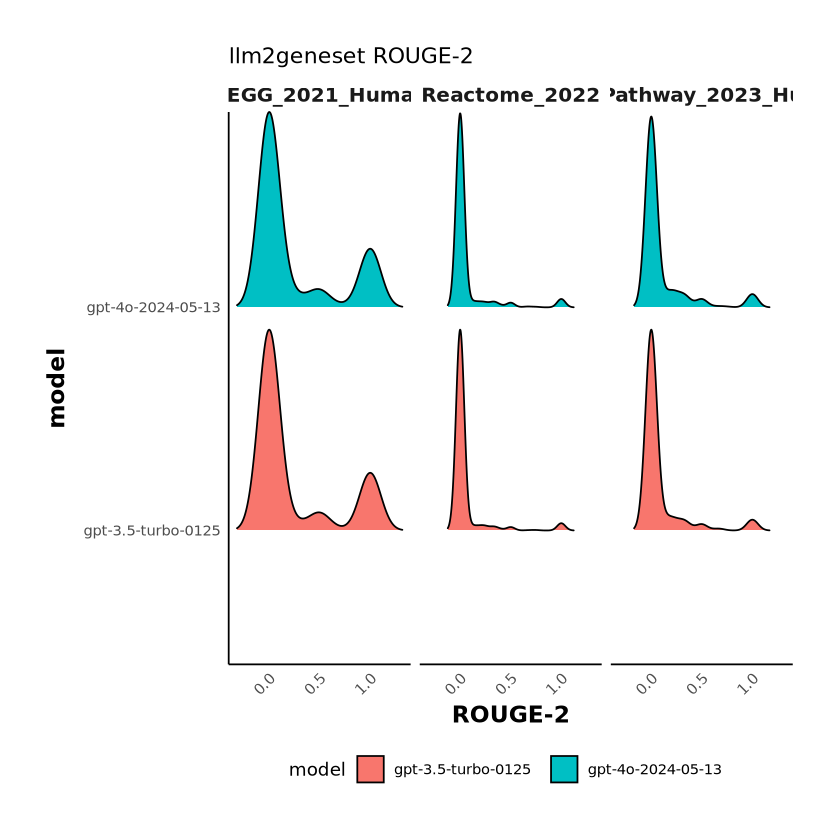

In [16]:
ridge2<-ggplot(df, aes(x = llm2geneset_ROUGE2, y = model, fill = model)) +
  geom_density_ridges(scale = 0.9) +
  facet_wrap(~ library) +
  labs(title = "llm2geneset ROUGE-2",
       x = "ROUGE-2",
       y = "model") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
ridge2

In [17]:
ggsave("figures/llm2geneset_ridge_rouge2.pdf", plot = ridge2, device = "pdf",width = 10, height = 5)

Picking joint bandwidth of 0.106

Picking joint bandwidth of 0.0409

Picking joint bandwidth of 0.0566



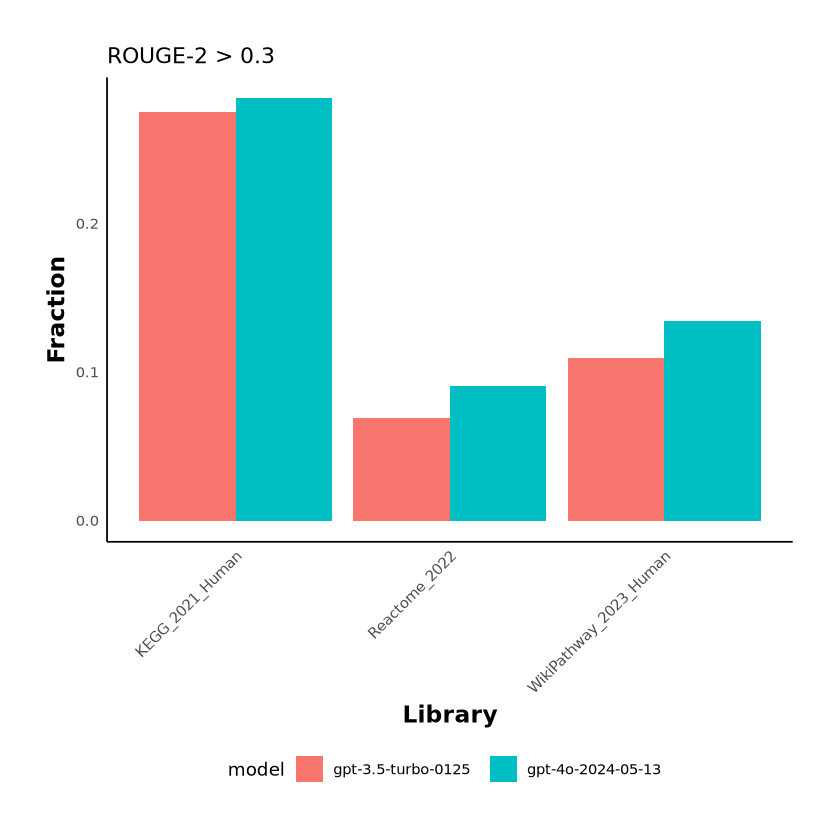

In [18]:
# Group by "library" and calculate the fractions
df_fractions <- df %>%
  group_by(model, library) %>%
  summarise(
    fraction = sum(llm2geneset_ROUGE2 > 0.3, na.rm = TRUE) / n(),
    .groups = 'drop'  # This will ungroup after summarising
  )


# Create the bar plot to show the fractions
bar2<-ggplot(df_fractions, aes(x = library, y = fraction, fill = model)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "ROUGE-2 > 0.3",
       x = "Library",
       y = "Fraction") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )


bar2

In [19]:
ggsave("figures/llm2geneset_bar_rouge2.pdf", plot = bar2, device = "pdf",width = 5, height = 5)

### ROUGE-L

Picking joint bandwidth of 0.114

Picking joint bandwidth of 0.0428

Picking joint bandwidth of 0.0629



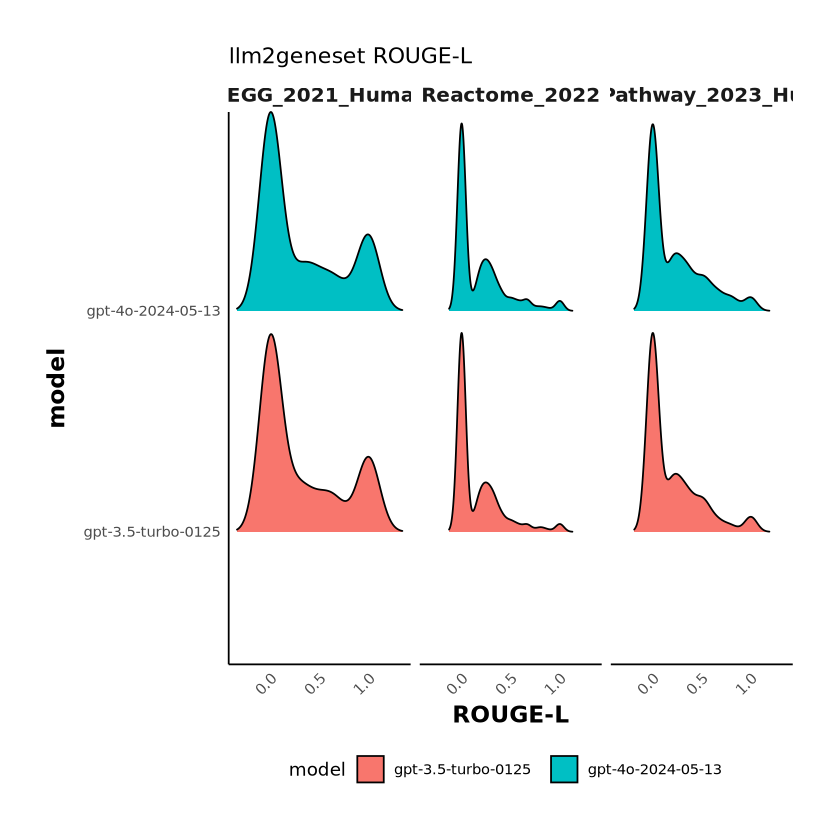

In [20]:
ridge3<-ggplot(df, aes(x = llm2geneset_ROUGEL, y = model, fill = model)) +
  geom_density_ridges(scale = 0.9) +
  facet_wrap(~ library) +
  labs(title = "llm2geneset ROUGE-L",
       x = "ROUGE-L",
       y = "model") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
ridge3

In [21]:
ggsave("figures/llm2geneset_ridge_rougel.pdf", plot = ridge3, device = "pdf",width = 10, height = 5)

Picking joint bandwidth of 0.114

Picking joint bandwidth of 0.0428

Picking joint bandwidth of 0.0629



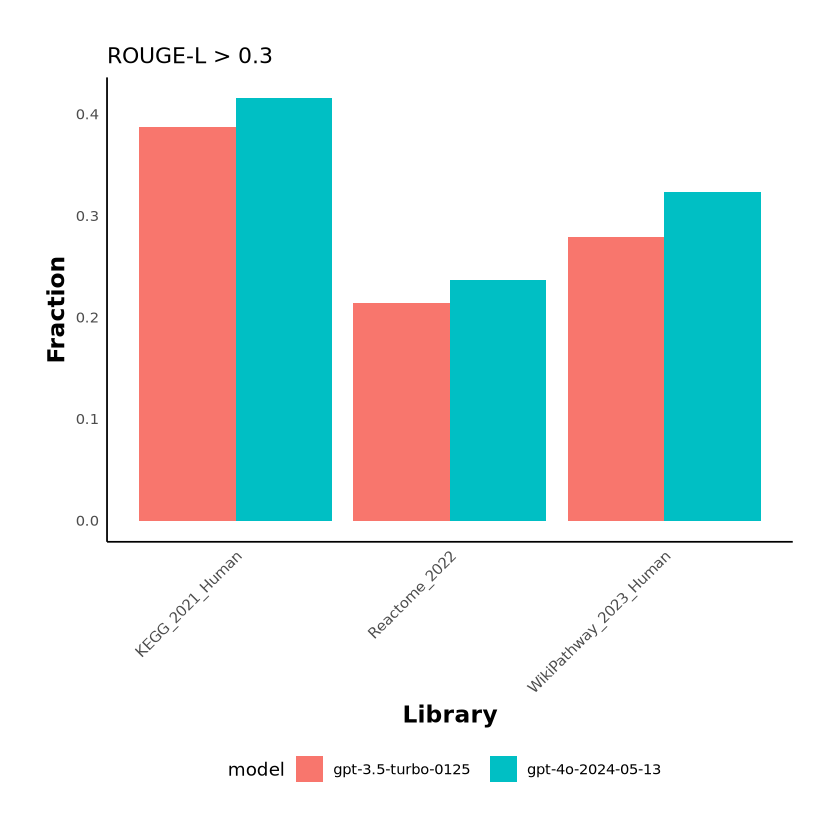

In [22]:
# Group by "library" and calculate the fractions
df_fractions <- df %>%
  group_by(model, library) %>%
  summarise(
    fraction = sum(llm2geneset_ROUGEL > 0.3, na.rm = TRUE) / n(),
    .groups = 'drop'  # This will ungroup after summarising
  )


# Create the bar plot to show the fractions
bar3<-ggplot(df_fractions, aes(x = library, y = fraction, fill = model)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "ROUGE-L > 0.3",
       x = "Library",
       y = "Fraction") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
bar3

In [23]:
ggsave("figures/llm2geneset_bar_rougel.pdf", plot = bar3, device = "pdf",width = 5, height = 5)

### cosime similarity

Picking joint bandwidth of 0.0586

Picking joint bandwidth of 0.0298

Picking joint bandwidth of 0.0403



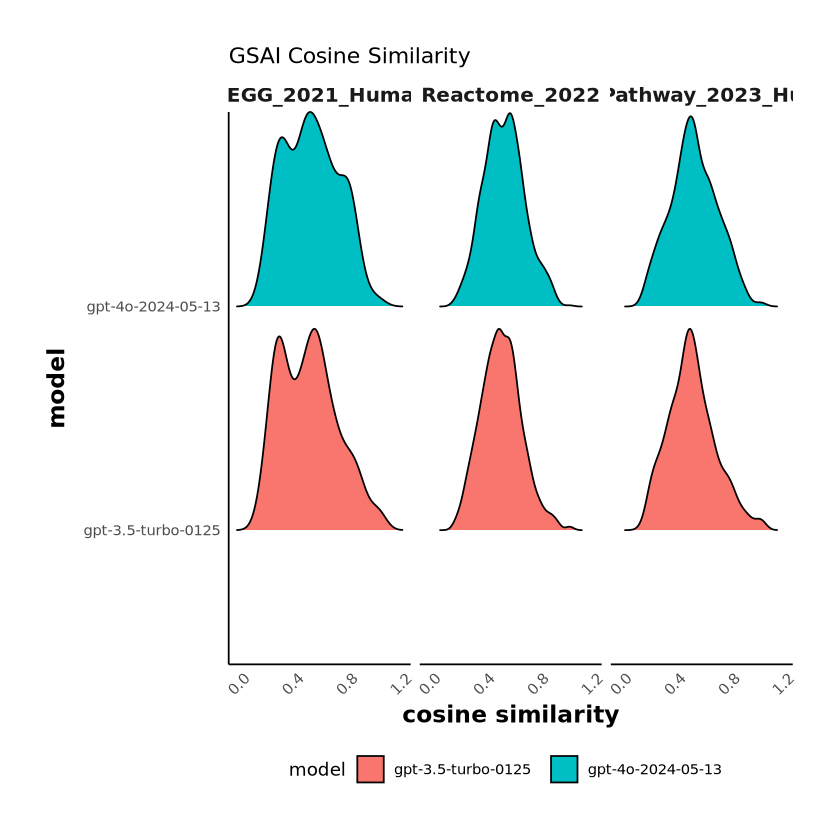

In [140]:
ridge4<-ggplot(df, aes(x = llm2geneset_csim, y = model, fill = model)) +
  geom_density_ridges(scale = 0.9) +
  facet_wrap(~ library) +
  labs(title = "llm2geneset Cosine Similarity",
       x = "cosine similarity",
       y = "model") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
ridge4

In [141]:
ggsave("figures/llm2geneset_ridge_csim.pdf", plot = ridge4, device = "pdf",width = 10, height = 5)

Picking joint bandwidth of 0.0586

Picking joint bandwidth of 0.0298

Picking joint bandwidth of 0.0403



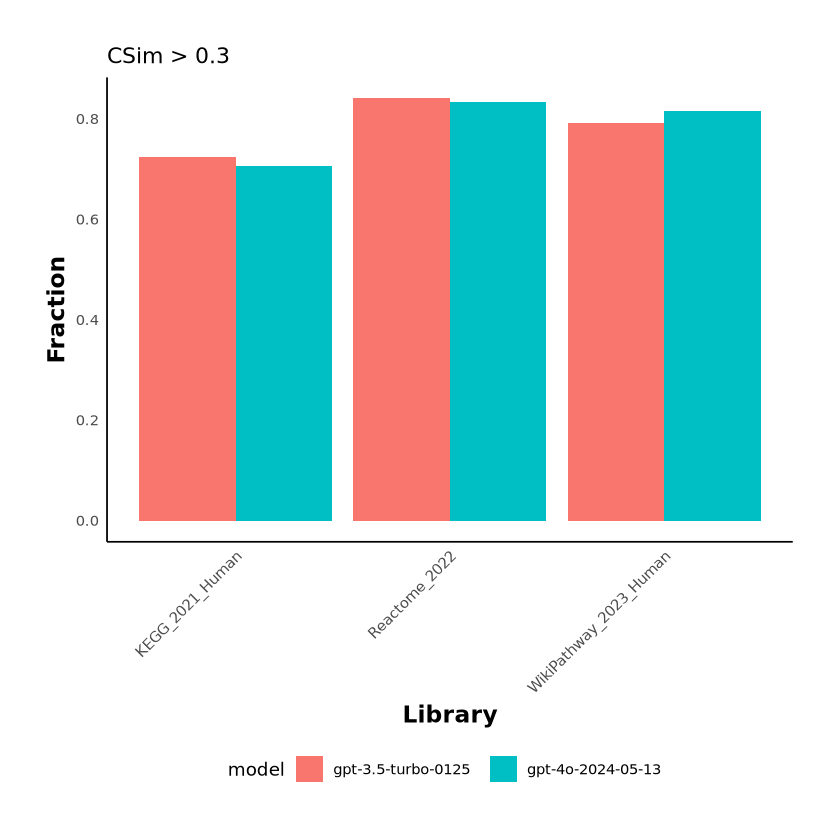

In [26]:
# Group by "library" and calculate the fractions
df_fractions <- df %>%
  group_by(model, library) %>%
  summarise(
    fraction = sum(llm2geneset_csim > 0.3, na.rm = TRUE) / n(),
    .groups = 'drop'  # This will ungroup after summarising
  )


# Create the bar plot to show the fractions
bar4<-ggplot(df_fractions, aes(x = library, y = fraction, fill = model)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "CSim > 0.3",
       x = "Library",
       y = "Fraction") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
bar4

In [27]:
ggsave("figures/llm2geneset_bar_rougel.pdf", plot = bar3, device = "pdf",width = 5, height = 5)

# GSAI vs llm2geneset

In [142]:
gsai_df <- read.delim('gsai_outputs.tsv', header = TRUE, sep = "\t")
llm2geneset_df <- read.delim('llm2geneset_outputs.tsv', header = TRUE, sep = "\t")

In [143]:
colnames(gsai_df)<-c('model','library','gt_name','name','ROUGE1','ROUGE2','ROUGEL','csim')
colnames(llm2geneset_df)<-c('model','library','gt_name','name','ROUGE1','ROUGE2','ROUGEL','csim')
gsai_df<-gsai_df%>%mutate(method='GSAI')
llm2geneset_df<-llm2geneset_df%>%mutate(method='LLM2geneset')

In [144]:
df<-rbind(gsai_df,llm2geneset_df)
head(df)

,model,library,gt_name,name,ROUGE1,ROUGE2,ROUGEL,csim,method
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,gpt-3.5-turbo-0125,KEGG_2021_Human,ABC transporters,ABC Transporter-Mediated Cellular Efflux and Detoxification Processes,1.0000000,1.0,0.4000000,0.6801286,GSAI
2,gpt-3.5-turbo-0125,KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,Cellular stress response and inflammatory signaling,0.1428571,0.0,0.1538462,0.4395503,GSAI
3,gpt-3.5-turbo-0125,KEGG_2021_Human,AMPK signaling pathway,Glucose metabolism and insulin signaling,0.3333333,0.0,0.2500000,0.5212444,GSAI
4,gpt-3.5-turbo-0125,KEGG_2021_Human,Acute myeloid leukemia,Cell Signaling and Transcriptional Regulation Network,0.0000000,0.0,0.0000000,0.2596153,GSAI
5,gpt-3.5-turbo-0125,KEGG_2021_Human,Adherens junction,Regulation of Cell Adhesion and Signaling Pathways,0.0000000,0.0,0.0000000,0.4732686,GSAI
6,gpt-3.5-turbo-0125,KEGG_2021_Human,Adipocytokine signaling pathway,Glucose metabolism and insulin signaling pathway,0.6666667,0.5,0.4444444,0.5828838,GSAI


In [145]:
df_grouped <- df %>%
  group_by(model, library,gt_name) %>%
  summarize(Count = n())


`summarise()` has grouped output by 'model', 'library'. You can override using the `.groups` argument.


In [146]:
## some wikipathway library is not unique
df_grouped[df_grouped$Count>2,]

model,library,gt_name,Count
<chr>,<chr>,<chr>,<int>
gpt-3.5-turbo-0125,WikiPathway_2023_Human,Aryl Hydrocarbon Receptor Pathway,4
gpt-3.5-turbo-0125,WikiPathway_2023_Human,Estrogen Metabolism,4
gpt-3.5-turbo-0125,WikiPathway_2023_Human,Hedgehog Signaling Pathway,4
gpt-3.5-turbo-0125,WikiPathway_2023_Human,Prostaglandin And Leukotriene Metabolism In Senescence,4
gpt-4o-2024-05-13,WikiPathway_2023_Human,Aryl Hydrocarbon Receptor Pathway,4
gpt-4o-2024-05-13,WikiPathway_2023_Human,Estrogen Metabolism,4
gpt-4o-2024-05-13,WikiPathway_2023_Human,Hedgehog Signaling Pathway,4
gpt-4o-2024-05-13,WikiPathway_2023_Human,Prostaglandin And Leukotriene Metabolism In Senescence,4


In [147]:
gsai_df[gsai_df$gt_name=='Aryl Hydrocarbon Receptor Pathway',]

,model,library,gt_name,name,ROUGE1,ROUGE2,ROUGEL,csim,method
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2267,gpt-3.5-turbo-0125,WikiPathway_2023_Human,Aryl Hydrocarbon Receptor Pathway,Cellular Signaling Network Integration,0,0,0,0.3094831,GSAI
2301,gpt-3.5-turbo-0125,WikiPathway_2023_Human,Aryl Hydrocarbon Receptor Pathway,Xenobiotic metabolism and detoxification,0,0,0,0.4304651,GSAI
5206,gpt-4o-2024-05-13,WikiPathway_2023_Human,Aryl Hydrocarbon Receptor Pathway,Signal Transduction and Cellular Proliferation Regulation,0,0,0,0.3944009,GSAI
5240,gpt-4o-2024-05-13,WikiPathway_2023_Human,Aryl Hydrocarbon Receptor Pathway,Inflammatory and Detoxification Response Regulation,0,0,0,0.4045328,GSAI


In [148]:
df_mean <- df %>%
group_by(method) %>%
  summarize(across(c(ROUGE1, ROUGE2, ROUGEL, csim), mean, na.rm = TRUE))



In [149]:
df_mean

method,ROUGE1,ROUGE2,ROUGEL,csim
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GSAI,0.2351951,0.07274800,0.1843345,0.5021910
LLM2geneset,0.2001048,0.09285021,0.1991447,0.4979709


In [174]:
df_long <- df_mean %>%
  pivot_longer(
    cols = ROUGE1:csim,  # Specify the columns to pivot
    names_to = "metric",  # Name of the new key column
    values_to = "value"   # Name of the new value column
  )

df_long

method,metric,value
<chr>,<chr>,<dbl>
GSAI,ROUGE1,0.23519506
GSAI,ROUGE2,0.07274800
GSAI,ROUGEL,0.18433446
GSAI,csim,0.50219095
LLM2geneset,ROUGE1,0.20010477
LLM2geneset,ROUGE2,0.09285021
LLM2geneset,ROUGEL,0.19914470
LLM2geneset,csim,0.49797092


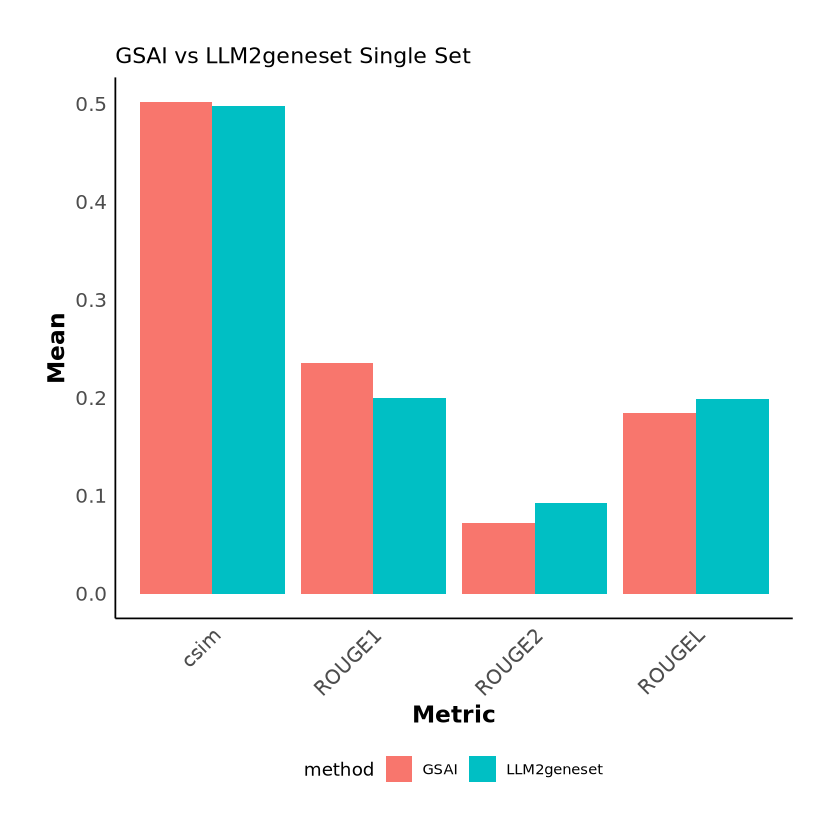

In [176]:
# Create the bar plot to show the fractions
bar<-ggplot(df_long, aes(x = metric, y = value, fill = method)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "GSAI vs LLM2geneset Single Set",
       x = "Metric",
       y = "Mean") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1,size=12),
    axis.text.y = element_text(size=12),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
bar

In [177]:
ggsave("figures/gsai_x_llm2geneset_bar1.pdf", plot = bar, device = "pdf",width = 5, height = 5)

In [158]:
head(df)

,model,library,gt_name,name,ROUGE1,ROUGE2,ROUGEL,csim,method
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,gpt-3.5-turbo-0125,KEGG_2021_Human,ABC transporters,ABC Transporter-Mediated Cellular Efflux and Detoxification Processes,1.0000000,1.0,0.4000000,0.6801286,GSAI
2,gpt-3.5-turbo-0125,KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,Cellular stress response and inflammatory signaling,0.1428571,0.0,0.1538462,0.4395503,GSAI
3,gpt-3.5-turbo-0125,KEGG_2021_Human,AMPK signaling pathway,Glucose metabolism and insulin signaling,0.3333333,0.0,0.2500000,0.5212444,GSAI
4,gpt-3.5-turbo-0125,KEGG_2021_Human,Acute myeloid leukemia,Cell Signaling and Transcriptional Regulation Network,0.0000000,0.0,0.0000000,0.2596153,GSAI
5,gpt-3.5-turbo-0125,KEGG_2021_Human,Adherens junction,Regulation of Cell Adhesion and Signaling Pathways,0.0000000,0.0,0.0000000,0.4732686,GSAI
6,gpt-3.5-turbo-0125,KEGG_2021_Human,Adipocytokine signaling pathway,Glucose metabolism and insulin signaling pathway,0.6666667,0.5,0.4444444,0.5828838,GSAI


In [160]:
df_long <- df %>%
  pivot_longer(
    cols = ROUGE1:csim,  # Specify the columns to pivot
    names_to = "metric",  # Name of the new key column
    values_to = "value"   # Name of the new value column
  )

df_long

model,library,gt_name,name,method,metric,value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
gpt-3.5-turbo-0125,KEGG_2021_Human,ABC transporters,ABC Transporter-Mediated Cellular Efflux and Detoxification Processes,GSAI,ROUGE1,1.0000000
gpt-3.5-turbo-0125,KEGG_2021_Human,ABC transporters,ABC Transporter-Mediated Cellular Efflux and Detoxification Processes,GSAI,ROUGE2,1.0000000
gpt-3.5-turbo-0125,KEGG_2021_Human,ABC transporters,ABC Transporter-Mediated Cellular Efflux and Detoxification Processes,GSAI,ROUGEL,0.4000000
gpt-3.5-turbo-0125,KEGG_2021_Human,ABC transporters,ABC Transporter-Mediated Cellular Efflux and Detoxification Processes,GSAI,csim,0.6801286
gpt-3.5-turbo-0125,KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,Cellular stress response and inflammatory signaling,GSAI,ROUGE1,0.1428571
gpt-3.5-turbo-0125,KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,Cellular stress response and inflammatory signaling,GSAI,ROUGE2,0.0000000
gpt-3.5-turbo-0125,KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,Cellular stress response and inflammatory signaling,GSAI,ROUGEL,0.1538462
gpt-3.5-turbo-0125,KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,Cellular stress response and inflammatory signaling,GSAI,csim,0.4395503
gpt-3.5-turbo-0125,KEGG_2021_Human,AMPK signaling pathway,Glucose metabolism and insulin signaling,GSAI,ROUGE1,0.3333333


Picking joint bandwidth of 0.0293

Picking joint bandwidth of 0.0395

Picking joint bandwidth of 0.0368

Picking joint bandwidth of 0.0357

Warning message:
“Removed 4 rows containing non-finite outside the scale range (`stat_density_ridges()`).”


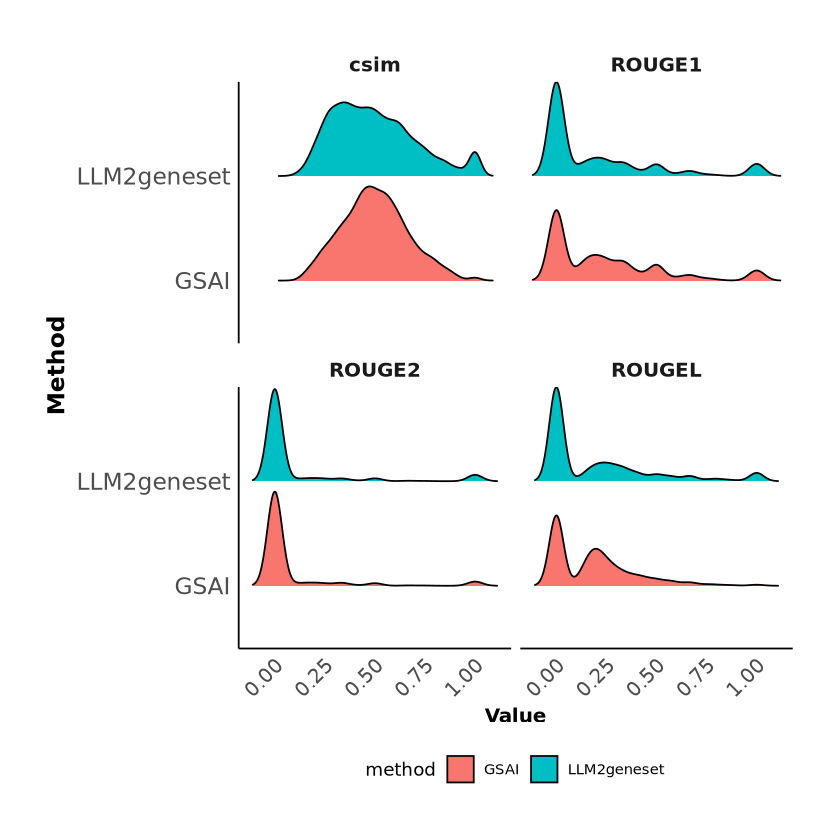

In [171]:
ridge<-ggplot(df_long, aes(x = value, y = method, fill = method)) +
  geom_density_ridges(scale = 0.9) +
  facet_wrap(~ metric) +
  labs(
       x = "Value",
       y = "Method") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1,size = 12),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(face = "bold", size = 12),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
ridge

In [173]:
ggsave("figures/gsai_x_llm2geneset_ridge1.pdf", plot = ridge, device = "pdf",width = 10, height = 5)

Picking joint bandwidth of 0.0293

Picking joint bandwidth of 0.0395

Picking joint bandwidth of 0.0368

Picking joint bandwidth of 0.0357

Warning message:
“Removed 4 rows containing non-finite outside the scale range (`stat_density_ridges()`).”


# Mixed Sets

In [2]:
df <- read.delim('mix_genesets_outputs.tsv', header = TRUE, sep = "\t")


In [5]:
head(df,3)

,model,library,gt_name,name,ROUGE1,ROUGE2,ROUGEL,csim,method
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism",Polyamine metabolism and oxidative stress regulation,0.3333333,0.00000000,0.1666667,0.5130253,GSAI
2,gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism","Arginine and proline metabolism, Arginine biosynthesis, Tryptophan metabolism, Alanine, aspartate and glutamate metabolism",0.8333333,0.60000000,0.5263158,0.8650603,LLM2geneset
3,gpt-3.5-turbo-0125,KEGG_2021_Human,"C-type lectin receptor signaling pathway, Viral protein interaction with cytokine and cytokine receptor",Inflammatory Signaling Pathway,0.1428571,0.07692308,0.2352941,0.5432497,GSAI


In [6]:
df_long <- df %>%
  pivot_longer(
    cols = ROUGE1:csim,  # Specify the columns to pivot
    names_to = "metric",  # Name of the new key column
    values_to = "value"   # Name of the new value column
  )

df_long

model,library,gt_name,name,method,metric,value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism",Polyamine metabolism and oxidative stress regulation,GSAI,ROUGE1,0.33333333
gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism",Polyamine metabolism and oxidative stress regulation,GSAI,ROUGE2,0.00000000
gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism",Polyamine metabolism and oxidative stress regulation,GSAI,ROUGEL,0.16666667
gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism",Polyamine metabolism and oxidative stress regulation,GSAI,csim,0.51302531
gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism","Arginine and proline metabolism, Arginine biosynthesis, Tryptophan metabolism, Alanine, aspartate and glutamate metabolism",LLM2geneset,ROUGE1,0.83333333
gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism","Arginine and proline metabolism, Arginine biosynthesis, Tryptophan metabolism, Alanine, aspartate and glutamate metabolism",LLM2geneset,ROUGE2,0.60000000
gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism","Arginine and proline metabolism, Arginine biosynthesis, Tryptophan metabolism, Alanine, aspartate and glutamate metabolism",LLM2geneset,ROUGEL,0.52631579
gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism","Arginine and proline metabolism, Arginine biosynthesis, Tryptophan metabolism, Alanine, aspartate and glutamate metabolism",LLM2geneset,csim,0.86506030
gpt-3.5-turbo-0125,KEGG_2021_Human,"C-type lectin receptor signaling pathway, Viral protein interaction with cytokine and cytokine receptor",Inflammatory Signaling Pathway,GSAI,ROUGE1,0.14285714


Picking joint bandwidth of 0.039

Picking joint bandwidth of 0.0752

Picking joint bandwidth of 0.0672

Picking joint bandwidth of 0.0562



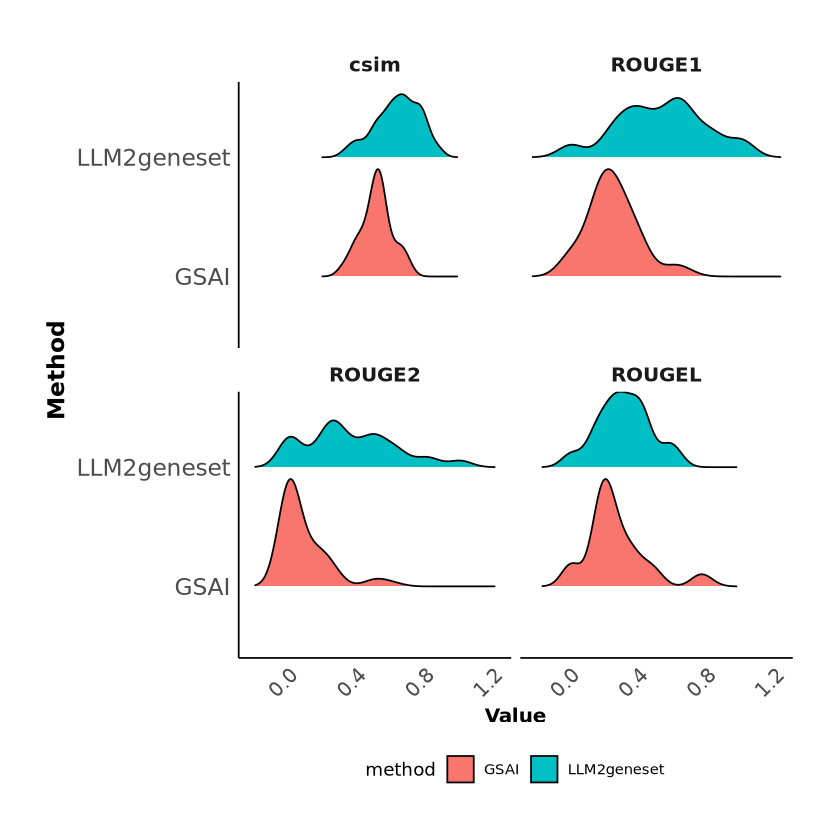

In [9]:
ridge<-ggplot(df_long, aes(x = value, y = method, fill = method)) +
  geom_density_ridges(scale = 0.9) +
  facet_wrap(~ metric) +
  labs(
       x = "Value",
       y = "Method") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1,size = 12),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(face = "bold", size = 12),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
ridge

`summarise()` has grouped output by 'method'. You can override using the
`.groups` argument.
Picking joint bandwidth of 0.039

Picking joint bandwidth of 0.0752

Picking joint bandwidth of 0.0672

Picking joint bandwidth of 0.0562



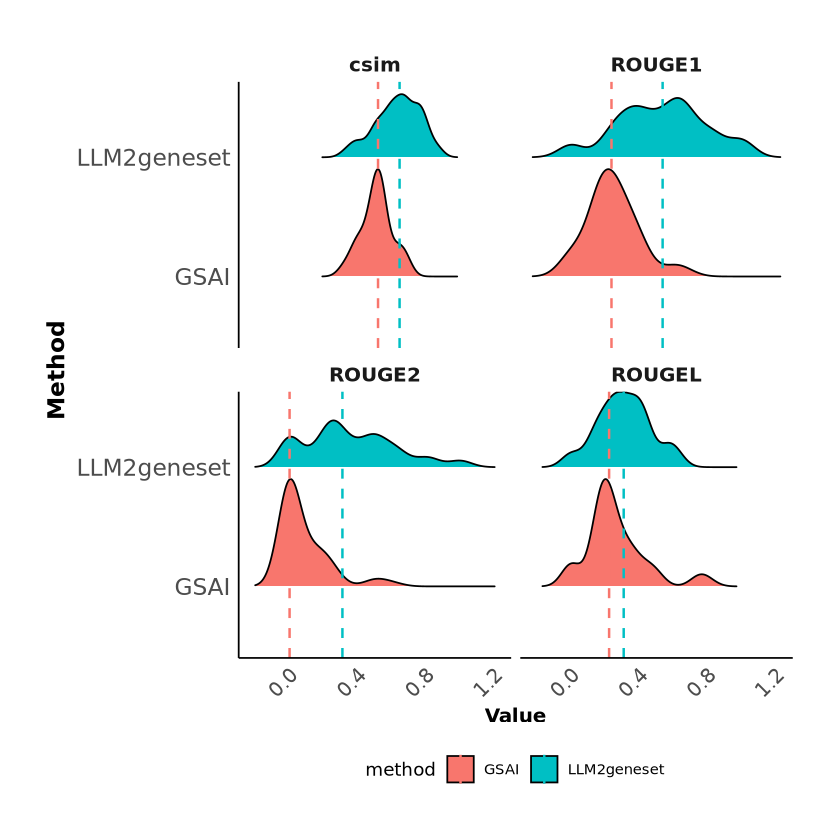

In [12]:
# Calculate medians for each group
medians <- df_long %>%
  group_by(method, metric) %>%
  summarize(median_value = median(value))

# Create the ridge plot with medians
ridge <- ggplot(df_long, aes(x = value, y = method, fill = method)) +
  geom_density_ridges(scale = 0.9) +
  facet_wrap(~ metric) +
  labs(
    x = "Value",
    y = "Method"
  ) +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(face = "bold", size = 12),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  ) +
  geom_vline(data = medians, aes(xintercept = median_value, color = method), linetype = "dashed", size = 0.7)

ridge

In [13]:
ggsave("figures/mix_genesets.pdf", plot = ridge, device = "pdf",width = 10, height = 5)

Picking joint bandwidth of 0.039

Picking joint bandwidth of 0.0752

Picking joint bandwidth of 0.0672

Picking joint bandwidth of 0.0562



In [16]:
df %>%
  arrange(desc(ROUGE1))

model,library,gt_name,name,ROUGE1,ROUGE2,ROUGEL,csim,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
gpt-3.5-turbo-0125,KEGG_2021_Human,"Mismatch repair, Nucleotide excision repair","Transcription-coupled nucleotide excision repair, Mismatch repair, Nucleotide excision repair, DNA replication",1.0000000,1.0000000,0.5882353,0.7470901,LLM2geneset
gpt-3.5-turbo-0125,KEGG_2021_Human,"Metabolism of xenobiotics by cytochrome P450, Ribosome","Ribosome, Metabolism of xenobiotics by cytochrome P450, Drug metabolism - cytochrome P450, Chemical carcinogenesis",1.0000000,0.8333333,0.6000000,0.8061672,LLM2geneset
gpt-3.5-turbo-0125,KEGG_2021_Human,"Tyrosine metabolism, Arachidonic acid metabolism","Tyrosine metabolism, Arachidonic acid metabolism, Drug metabolism - cytochrome P450, Histidine metabolism",1.0000000,1.0000000,0.6250000,0.8640238,LLM2geneset
gpt-3.5-turbo-0125,KEGG_2021_Human,"Insulin signaling pathway, Thyroid hormone synthesis","Glucose metabolism, Insulin signaling pathway, Regulation of glycogen metabolism, Thyroid hormone synthesis, MAPK signaling pathway",1.0000000,0.8000000,0.5714286,0.7916031,LLM2geneset
gpt-3.5-turbo-0125,KEGG_2021_Human,"Protein export, Valine, leucine and isoleucine degradation","Valine, leucine and isoleucine degradation, Fatty acid beta-oxidation using acyl-CoA dehydrogenase, Protein targeting to endoplasmic reticulum",0.8571429,0.6666667,0.4000000,0.7535419,LLM2geneset
gpt-3.5-turbo-0125,KEGG_2021_Human,"Arginine and proline metabolism, Phenylalanine metabolism","Arginine and proline metabolism, Arginine biosynthesis, Tryptophan metabolism, Alanine, aspartate and glutamate metabolism",0.8333333,0.6000000,0.5263158,0.8650603,LLM2geneset
gpt-3.5-turbo-0125,KEGG_2021_Human,"JAK-STAT signaling pathway, Glycolysis / Gluconeogenesis","Jak-Stat signaling pathway, Glycolysis, Interleukin-23 signaling, PI3K-Akt signaling pathway, Negative regulation of apoptotic process",0.8333333,0.8000000,0.4347826,0.7884561,LLM2geneset
gpt-3.5-turbo-0125,KEGG_2021_Human,"Chemokine signaling pathway, VEGF signaling pathway","Chemokine signaling pathway, Ras signaling pathway, MAPK signaling pathway, PI3K-Akt signaling pathway, NF-kappa B signaling pathway",0.8333333,0.6000000,0.4166667,0.7680708,LLM2geneset
gpt-3.5-turbo-0125,KEGG_2021_Human,"Phosphatidylinositol signaling system, Insulin resistance","phosphatidylinositol signaling system, phosphatidylinositol biosynthetic process, insulin signaling pathway, AMPK signaling pathway, regulation of cellular response to insulin stimulus",0.8000000,0.5000000,0.3333333,0.7767263,LLM2geneset
